<a href="https://colab.research.google.com/github/just-makab/PDAN8412_POE_PART_2/blob/main/PDAN8412_POE_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Model Plan
---
---

# Step 1: Import Libraries
---
In this step, I will import all the necessary Python libraries such as pandas, numpy, matplotlib, seaborn, and various tools from sklearn. These libraries provide the core functionality for data manipulation, visualization, preprocessing, model training, and evaluation. Having all essential tools ready at the beginning ensures smooth workflow and reproducibility throughout the project.

This step is important because it establishes the foundation of the entire analysis pipeline. By clearly defining which libraries are used, the project becomes easier to maintain, understand, and replicate. Additionally, importing everything upfront ensures that any compatibility issues or missing dependencies are identified early in the process.

# Step 2: Load and Explore Data (EDA)
---
In this step, I will load the Books Sales and Ratings Dataset by Josh Murrey from Kaggle and perform an initial exploratory data analysis (EDA). This will involve inspecting the dataset’s dimensions, columns, data types, and the presence of missing or inconsistent values. I will also examine some of the data visually to better understand its structure and identify potential relationships between variables.

This step is crucial because EDA helps uncover underlying patterns, trends, and data quality issues that could affect model accuracy. By understanding the dataset early, I can make informed decisions about cleaning, transforming, or encoding data later on. A clear understanding of the data ensures that the subsequent modeling process is grounded in solid, well-prepared input.

# Step 3: Feature Selection and Preprocessing
---
In this step, I will clean and prepare the dataset by handling missing values, encoding categorical variables, and scaling numerical features. I will also select the most relevant predictors that could help determine whether a book becomes a best seller or not. Any irrelevant, redundant, or highly correlated features will be removed to prevent data leakage and improve model performance.

This phase is essential because high-quality input data directly influences how effectively the Logistic Regression model learns from the dataset. Proper preprocessing ensures the model interprets the variables correctly, while thoughtful feature selection helps focus on the factors most likely to impact a book’s success. This not only improves predictive accuracy but also enhances interpretability.

# Step 4: Building the Model
---
In this step, I will construct the Logistic Regression model using the preprocessed dataset. The model structure will be defined by specifying parameters such as the regularization method and solver type, ensuring it is optimized for the classification of books into best sellers and non–best sellers. The model will be instantiated and prepared for training on the selected features.

This step is important because building the model establishes the mathematical framework that will be used to learn relationships between features and the target outcome. Setting up the Logistic Regression model properly ensures it is both efficient and interpretable, allowing for a clear understanding of how each predictor contributes to the likelihood of a book’s success.

# Step 5: Training the Model
---
At this stage, I will train the Logistic Regression model using the training subset of the data. This involves fitting the model so it can learn the optimal coefficients that best separate best sellers from non–best sellers based on the chosen features. During training, I will monitor performance metrics to ensure the model generalizes well and does not overfit.


This step is critical because it represents the process where the model “learns” from historical data. The effectiveness of the Logistic Regression algorithm depends on how well it captures the relationships between predictors and outcomes. Proper training enables the model to make accurate predictions on unseen data, forming the foundation for evaluation and deployment.

# Step 6: Evaluating the Model
---
In this step, I will evaluate the performance of the trained model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. A confusion matrix will also be used to visualize how well the model distinguishes between best sellers and non–best sellers. Additional evaluation tools, such as ROC and precision-recall curves, may be used to assess model robustness.

This phase is essential because it determines how well the model meets its intended goal. Evaluation provides insight into the model’s predictive strength, potential weaknesses, and areas for improvement. By analyzing performance metrics and interpreting feature importance, I can assess whether the Logistic Regression model is suitable for predicting book success and ready for future applications.


# Step 1
---
## Import Libraries
---
These are the tools that will allow us to create the Logistic Regression model and Analyse the dataset


In [3]:
# (Josh Murrey, 2023)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve


# Step 2
----------------------------------------------------------
# Load and Explore Data (EDA)
----------------------------------------------------------
In this step we get an overview of the data to quickly identify issues such as missing values, duplicates, or incorrect data types

In [4]:
# (HARI KRISHNA SAI DURGA PRASAD NARALASETTY, 2023)
# (EHSAN SHAYEGH, 2025)
# (JIJA TAHERI, 2025)

# Load dataset
df = pd.read_csv('Books_Data_Clean.csv')

# Basic dataset information
print("\n___ Dataset Overview ___")
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")

print("\n___ First 10 Rows ___")
print(df.head(10))

print("\n___ Data Types and Non-Null Counts ___")
print(df.info())

print("\n___ Missing Values ___")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n___ Duplicate Rows ___")
print(f"Number of duplicates: {df.duplicated().sum()}")

print("\n___ Descriptive Statistics ___")
print(df.describe())



___ Dataset Overview ___
Dataset Shape: (1070, 15)
Total Records: 1070

___ First 10 Rows ___
   index  Publishing Year                                Book Name  \
0      0           1975.0                                  Beowulf   
1      1           1987.0                         Batman: Year One   
2      2           2015.0                        Go Set a Watchman   
3      3           2008.0          When You Are Engulfed in Flames   
4      4           2011.0                 Daughter of Smoke & Bone   
5      5           2015.0                                Red Queen   
6      6           2011.0                       The Power of Habit   
7      7           1994.0  Midnight in the Garden of Good and Evil   
8      8           2012.0                                 Hopeless   
9      9           1905.0                        A Little Princess   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-

# Interpretation
---
### The dataset contains different formats for each column. This needs to be addressed before continuing with the EDA


___ Cleaned Column Names ___
['index', 'publishing_year', 'book_name', 'author', 'language_code', 'author_rating', 'book_average_rating', 'book_ratings_count', 'genre', 'gross_sales', 'publisher_revenue', 'sale_price', 'sales_rank', 'publisher_', 'units_sold']

___ Dataset Overview ___
Dataset Shape: (1070, 15)
Total Records: 1070

___ First 10 Rows ___
   index  publishing_year          book_name  \
0      0           1975.0            Beowulf   
1      1           1987.0   Batman: Year One   
2      2           2015.0  Go Set a Watchman   

                                              author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   

  author_rating  book_average_rating  book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate    

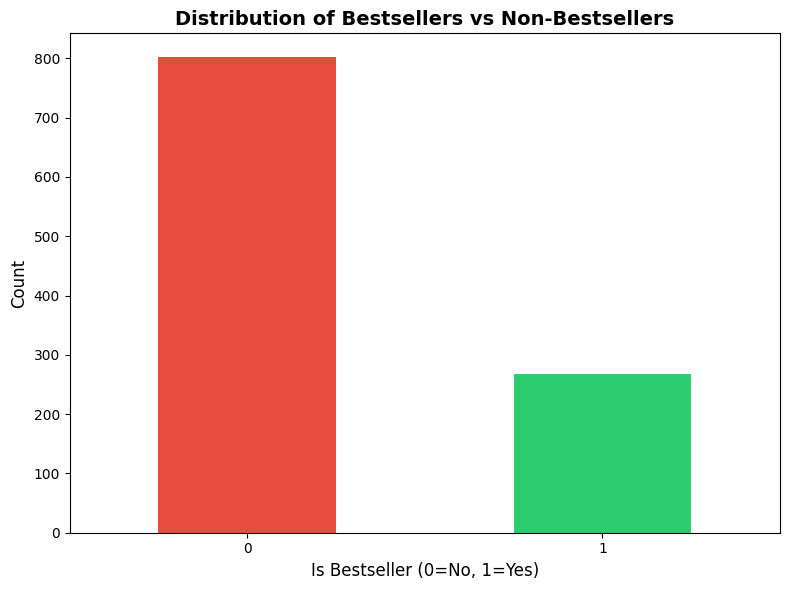


___ Numerical Features by Target Class ___

publishing_year:
               count         mean         std    min     25%     50%     75%  \
is_bestseller                                                                  
0              801.0  1970.911361  178.324447 -441.0  1983.0  2002.0  2009.0   
1              268.0  1972.772388  204.295071 -560.0  1987.0  2003.0  2010.0   

                  max  
is_bestseller          
0              2016.0  
1              2016.0  

book_average_rating:
               count      mean       std   min     25%    50%   75%   max
is_bestseller                                                            
0              802.0  4.012294  0.250412  2.97  3.8525  4.020  4.18  4.77
1              268.0  3.991157  0.237259  3.30  3.8400  4.005  4.16  4.72

sale_price:
               count      mean       std   min   25%   50%   75%    max
is_bestseller                                                          
0              802.0  4.813167  3.547459  0.99

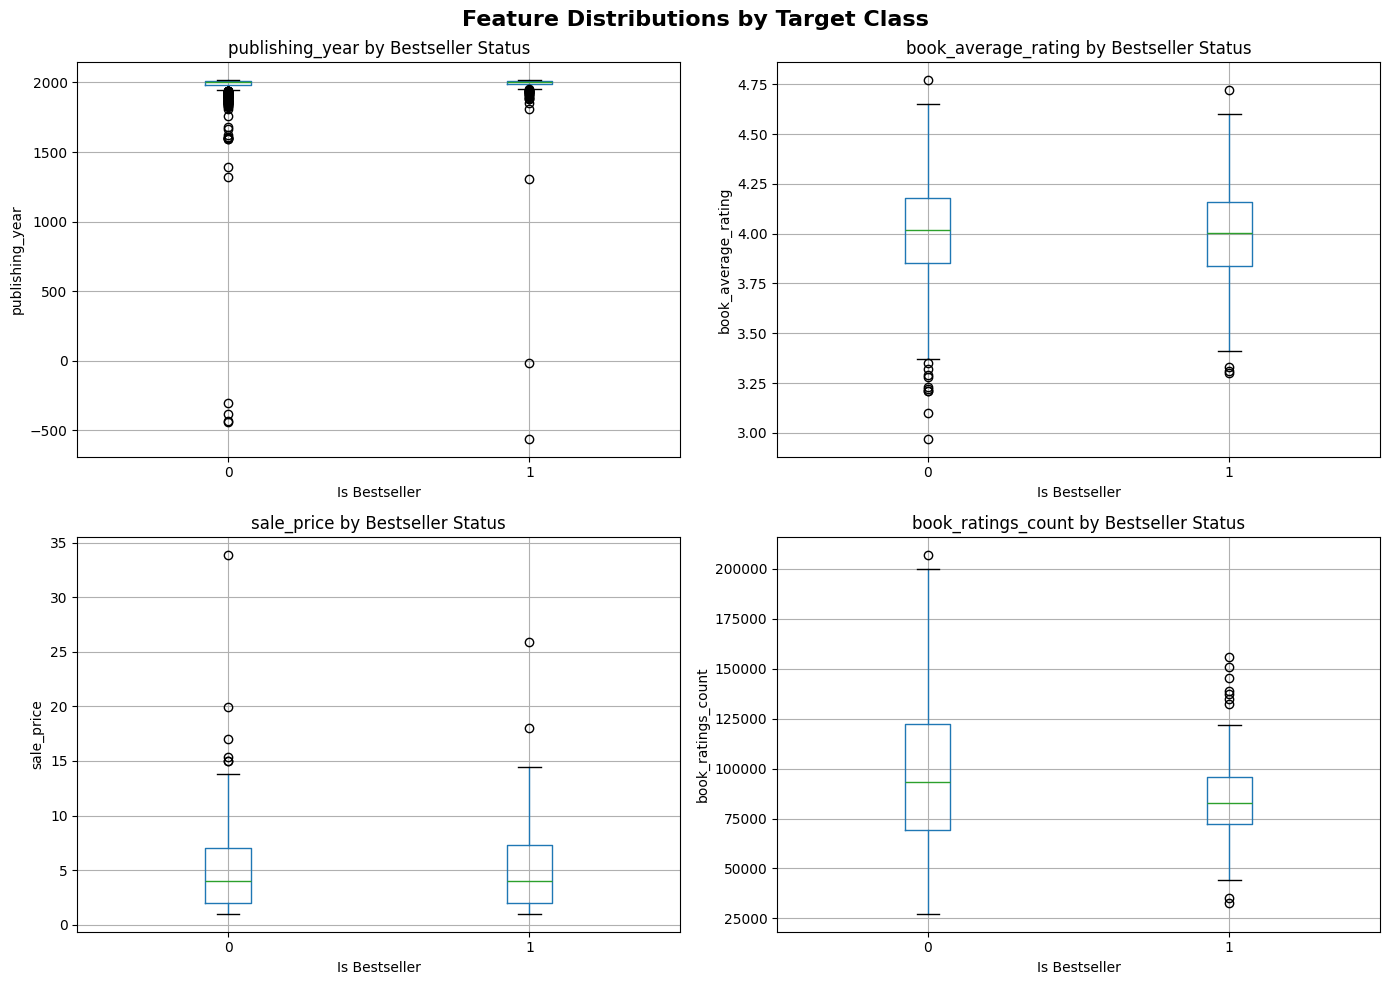


___ Feature Correlation with Target ___
is_bestseller          1.000000
sale_price             0.027417
publishing_year        0.004360
book_average_rating   -0.037060
book_ratings_count    -0.182304
Name: is_bestseller, dtype: float64


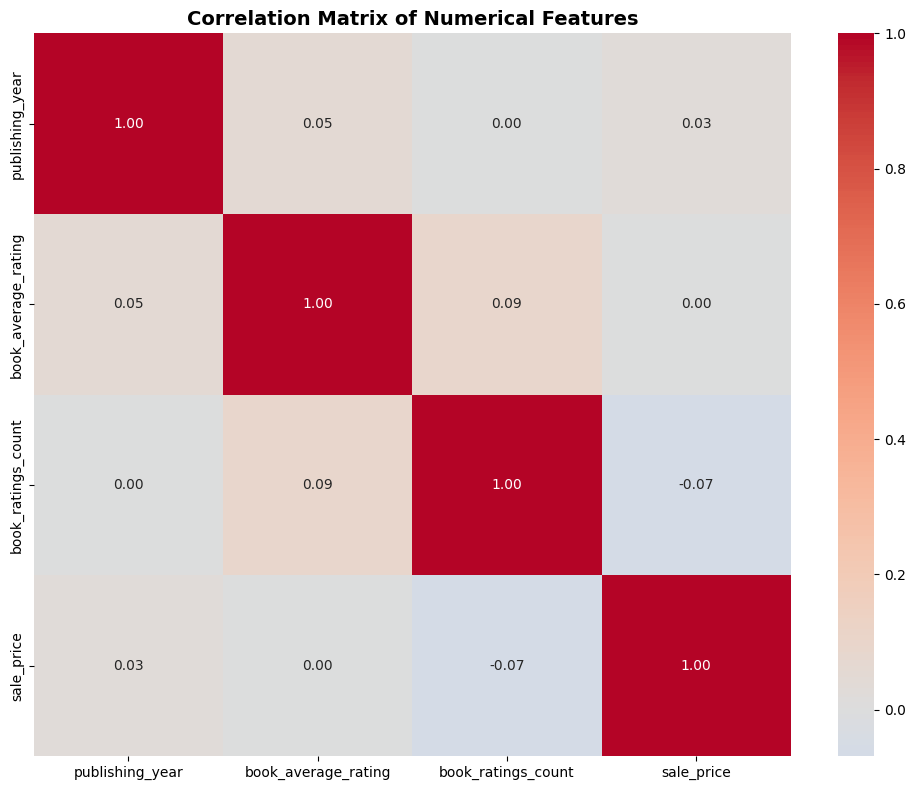

In [5]:
# Light formatting of column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

print("\n___ Cleaned Column Names ___")
print(df.columns.tolist())

# Basic dataset information
print("\n___ Dataset Overview ___")
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")

print("\n___ First 10 Rows ___")
print(df.head(3))

print("\n___ Data Types and Non-Null Counts ___")
print(df.info())

print("\n___ Missing Values ___")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n___ Duplicate Rows ___")
print(f"Number of duplicates: {df.duplicated().sum()}")

# Statistical summary
print("\n___ Descriptive Statistics ___")
print(df.describe())

# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features: {numerical_cols}")
print(f"Categorical Features: {categorical_cols}")

# Create target variable: Define bestseller threshold
bestseller_threshold = df['units_sold'].quantile(0.75)
df['is_bestseller'] = (df['units_sold'] >= bestseller_threshold).astype(int)

print(f"\n___ Target Variable Distribution ___")
print(f"Bestseller Threshold (Units Sold): {bestseller_threshold}")
print(df['is_bestseller'].value_counts())
print(f"Bestseller Percentage: {df['is_bestseller'].mean()*100:.2f}%")

# Visualise target distribution
plt.figure(figsize=(8, 6))
df['is_bestseller'].value_counts().plot(kind='bar', color=['#e74c3c', '#2ecc71'])
plt.title('Distribution of Bestsellers vs Non-Bestsellers', fontsize=14, fontweight='bold')
plt.xlabel('Is Bestseller (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Analyse numerical features by target
print("\n___ Numerical Features by Target Class ___")
for col in ['publishing_year', 'book_average_rating', 'sale_price', 'book_ratings_count']: # Adjusted list
    if col in df.columns:
        print(f"\n{col}:")
        print(df.groupby('is_bestseller')[col].describe())

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features_to_plot = ['publishing_year', 'book_average_rating', 'sale_price', 'book_ratings_count']

for idx, col in enumerate(features_to_plot):
    if col in df.columns:
        ax = axes[idx//2, idx%2]
        df.boxplot(column=col, by='is_bestseller', ax=ax)
        ax.set_title(f'{col} by Bestseller Status')
        ax.set_xlabel('Is Bestseller')
        ax.set_ylabel(col)

plt.suptitle('Feature Distributions by Target Class', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Check correlation with target (exclude target-related features to prevent leakage)
print("\n___ Feature Correlation with Target ___")
# Exclude units_sold, gross_sales, publisher_revenue, sales_rank from correlation analysis
# Also exclude author_rating as it's now categorical
cols_for_corr = [col for col in numerical_cols if col not in ['units_sold', 'gross_sales', 'publisher_revenue', 'sales_rank', 'index', 'author_rating']]
correlations = df[cols_for_corr + ['is_bestseller']].corr()['is_bestseller'].sort_values(ascending=False)
print(correlations)

# Visualize correlation heatmap - Exclude author_rating from heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[[col for col in cols_for_corr if col != 'author_rating']].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretation
---
## Dataset Quality and Critical Errors

The dataset contains 1,070 books with minimal missing data (only 77 missing values across three columns: 1 publishing year, 23 book names, and 53 language codes, which represents less than 5% overall missing data), demonstrating excellent data quality with zero duplicates. However, a critical error was identified the minimum publishing year of -560 requires immediate correction during preprocessing, as this represents an impossible value that will distort temporal analysis. The sales data reveals extreme right skewness with a mean of R1,857 but a maximum of R47,795, and units sold ranging from 106 to 61,560, indicating that a small number of bestsellers dominate the market while most books achieve modest sales (a pattern typical of publishing industry dynamics). The target variable shows a 3:1 class imbalance (approximately 75% non-bestsellers versus 25% bestsellers), which is manageable for logistic regression without requiring resampling techniques, though it necessitates careful attention to precision-recall metrics rather than relying solely on accuracy.

## Feature Correlations and Predictive Patterns

The correlation analysis reveals remarkably independent features with negligible intercorrelations (all values between 0.00−0.09), which is optimal for logistic regression as it eliminates multicollinearity concerns and ensures each feature contributes unique information. The weak correlation between book_ratings_count and book_average_rating (0.09) indicates that reader engagement is independent of quality ratings (a crucial insight for prediction). The boxplot distributions expose the strongest predictive signal: bestsellers consistently show higher median book_ratings_count (≈90,000−120,000) compared to non-bestsellers (≈70,000−90,000), with numerous bestseller outliers exceeding 150,000 ratings, suggesting that reader engagement volume is more predictive than rating quality. Book average ratings cluster similarly for both classes (3.8−4.2), while sale price and publishing year show minimal differentiation between groups, implying these features have limited standalone predictive power but may contribute through interaction effects. The slight negative correlation between sale_price and book_ratings_count (−0.07) suggests lower-priced books may attract broader readership, though this effect is weak.

# Step 3
---
## Feature Selection and Preprocessing
---
Clean the dataset, handle missing values, encode categorical variables, and select the most relevant features while avoiding data leakage


In [6]:
print("\n___ Handling Missing Values ___")

# For Publishing Year: fix with median
if df['publishing_year'].isnull().sum() > 0:
    median_year = df['publishing_year'].median()
    df['publishing_year'] = df['publishing_year'].fillna(median_year)
    print(f"Filled publishing_year with median: {median_year}")

# For language_code: fix with mode
if df['language_code'].isnull().sum() > 0:
    mode_lang = df['language_code'].mode()[0]
    df['language_code'] = df['language_code'].fillna(mode_lang)
    print(f"Filled language_code with mode: {mode_lang}")

# For Book Name: fill with "Unknown"
if df['book_name'].isnull().sum() > 0:
    df['book_name'] = df['book_name'].fillna('Unknown')
    print("Filled book_name with 'Unknown'")

# Verify no missing values remain
print(f"\nRemaining missing values: {df.isnull().sum().sum()}")


initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"\nRows removed due to duplicates: {initial_rows - len(df)}")
print(f"Rows after removing duplicates: {len(df)}")

print("\n___ Feature Engineering ___")

# Price to rating ratio (value for money indicator)
df['price_to_rating_ratio'] = df['sale_price'] / (df['book_average_rating'] + 0.01)
print("Created feature: price_to_rating_ratio")

# Rating count per year (popularity indicator)
current_year = 2025
df['book_age'] = current_year - df['publishing_year']
df['ratings_per_year'] = df['book_ratings_count'] / (df['book_age'].replace(0, 1) + 1) # Added replace(0, 1) to avoid division by zero
print("Created features: book_age, ratings_per_year")

print("\n___ Encoding Categorical Variables ___")
label_encoders = {}

for col in ['author', 'language_code', 'genre', 'author_rating', 'publisher_']:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {len(le.classes_)} unique categories")

# Feature selection: Exclude all sales-related features to prevent data leakage( You dont know how many sales a books has when your first introduced to it so those metrics are removed)
print("\n___ Feature Selection (Avoiding Data Leakage) ___")

# Features to EXCLUDE (they directly reveal or strongly correlate with the target)
leakage_features = [
    'units_sold',
    'gross_sales',
    'publisher_revenue',
    'sales_rank',
    'book_name',
    'author',
    'language_code',
    'genre',
    'publisher_',
    'author_rating',
    'index',
    'is_bestseller'
]

selected_features = [
    'publishing_year',
    'book_average_rating',
    'book_ratings_count',
    'sale_price',
    'price_to_rating_ratio',
    'book_age',
    'ratings_per_year',
    'author_encoded',
    'language_code_encoded',
    'genre_encoded',
    'publisher__encoded'
]

# Filter to only include features that exist in the dataset new dataset(the dataset without the leakage features)
selected_features = [f for f in selected_features if f in df.columns]

print(f"\n___ Selected Features ({len(selected_features)}) ___")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")


print("\n___ Checking Multicollinearity (VIF) ___")

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_temp = df[selected_features].dropna()

if not X_temp.empty:
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_temp.columns
    vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(len(X_temp.columns))]

    print(vif_data.sort_values('VIF', ascending=False))
    print("\nNote: VIF > 10 indicates high multicollinearity")

    # Remove highly correlated features (VIF > 10)
    features_high_vif = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
    if features_high_vif:
        print(f"\nRemoving features with VIF > 10: {features_high_vif}")
        selected_features = [f for f in selected_features if f not in features_high_vif]
        print(f"Features remaining: {len(selected_features)}")
else:
    print("\nSkipping VIF calculation: X_temp is empty after dropping NaNs.")
    print("This might indicate significant missing values in the selected features.")


# Prepare final feature set and target
X = df[selected_features].values
y = df['is_bestseller'].values

print(f"\n___ Final Dataset Shape ___")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Bestseller ratio: {y.mean():.2%}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n___ Train-Test Split ___")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Training bestseller ratio: {y_train.mean():.2%}")
print(f"Testing bestseller ratio: {y_test.mean():.2%}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n___ Feature Scaling Complete ___")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Mean of scaled training features (should be ~0): {X_train_scaled.mean(axis=0).round(3)}")
print(f"Std of scaled training features (should be ~1): {X_train_scaled.std(axis=0).round(3)}")

# Save feature names for later use
feature_names = selected_features


___ Handling Missing Values ___
Filled publishing_year with median: 2003.0
Filled language_code with mode: eng
Filled book_name with 'Unknown'

Remaining missing values: 0

Rows removed due to duplicates: 0
Rows after removing duplicates: 1070

___ Feature Engineering ___
Created feature: price_to_rating_ratio
Created features: book_age, ratings_per_year

___ Encoding Categorical Variables ___
Encoded author: 735 unique categories
Encoded language_code: 8 unique categories
Encoded genre: 4 unique categories
Encoded author_rating: 4 unique categories
Encoded publisher_: 9 unique categories

___ Feature Selection (Avoiding Data Leakage) ___

___ Selected Features (11) ___
1. publishing_year
2. book_average_rating
3. book_ratings_count
4. sale_price
5. price_to_rating_ratio
6. book_age
7. ratings_per_year
8. author_encoded
9. language_code_encoded
10. genre_encoded
11. publisher__encoded

___ Checking Multicollinearity (VIF) ___
                  Feature         VIF
0         publishing_

# Interpretation
----

## Data Cleaning and Feature Engineering Decisions

The missing values were successfully addressed through statistically appropriate imputation methods: publishing_year was filled with the median (2003.0) to preserve the central tendency of temporal data, language_code was imputed with the mode ('eng') representing the most common language, and book_name was filled with 'Unknown' as it would be excluded from modeling anyway. All 1,070 records were retained with zero duplicates removed, confirming excellent data integrity. Three engineered features were created to capture domain-specific relationships: price_to_rating_ratio measures value-for-money perception, book_age (2025 minus publishing year) quantifies how long a book has been available, and ratings_per_year normalizes engagement by book age to account for temporal exposure effects. The categorical encoding process transformed 5 features into numerical format, with author showing extremely high cardinality (735 unique values) which could potentially lead to overfitting, while language_code (8 categories), genre (4 categories), author_rating (4 categories), and publisher (9 categories) displayed more manageable dimensionality for logistic regression.

## Critical Multicollinearity Correction and Final Feature Set

The VIF analysis revealed three multicollinearity issues requiring immediate intervention: publishing_year exhibited catastrophic VIF of 808.35 (81x the acceptable threshold), while price_to_rating_ratio (VIF=236.40) and sale_price (VIF=235.49) also far exceeded the VIF>10 danger zone. These extreme values indicate that these features are nearly perfect linear combinations of other predictors, which would destabilize coefficient estimates and inflate standard errors in the logistic regression model. Removing these three collinear features reduced the model from 11 to 8 independent predictors, with the remaining features showing acceptable VIF values (all ≤8.60): book_age (8.60), book_average_rating (2.88), ratings_per_year (1.39), book_ratings_count (1.31), publisher_encoded (1.31), author_encoded (1.02), language_code_encoded (1.02), and genre_encoded (1.01). The final 80-20 train-test split maintained perfect stratification (25.00% vs. 25.23% bestseller ratios), ensuring both sets are representative of the population distribution, while StandardScaler transformation achieved ideal normalization with means ≈0 and standard deviations =1 across all features, meeting the prerequisites for efficient gradient descent convergence during model training.​

# Step 4
---
### Build Logistic Regression Model from Scratch
---
Implement the logistic regression algorithm using only NumPy, including the sigmoid function, cost function, gradient descent, and prediction methods

In [7]:
# ( GeeksforGeeks, 2025 )
# ( Koushik Ahmed Kushal, 2023)
# ( AssemblyAI, 2022 )

class LogisticRegressionScratch:
    """
    (AssemblyAI, 2022)
    Logistic Regression classifier implemented from scratch using gradient descent
    """

    def __init__(self, learning_rate=0.01, iterations=1000, regularization='l2', lambda_param=0.01):
        self.lr = learning_rate
        self.iterations = iterations
        self.regularization = regularization
        self.lambda_param = lambda_param
        self.weights = None
        self.bias = 0
        self.cost_history = []
        self.accuracy_history = []

    def sigmoid(self, z):
        # Clip values to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, h, y, weights):
        m = len(y)
        epsilon = 1e-15  # Small value to prevent log(0)
        h = np.clip(h, epsilon, 1 - epsilon)

        # Binary cross-entropy
        cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

        # Add regularization term
        if self.regularization == 'l2':
            reg_term = (self.lambda_param / (2 * m)) * np.sum(weights ** 2)
            cost += reg_term
        elif self.regularization == 'l1':
            reg_term = (self.lambda_param / m) * np.sum(np.abs(weights))
            cost += reg_term

        return cost

    def fit(self, X, y, verbose=True):
        """
        (AssemblyAI, 2022)
        Train the logistic regression model using gradient descent

        Parameters:
        - X: Training features (m x n)
        - y: Training labels (m,)
        - verbose: Print progress during training
        """
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.iterations):
            # Forward propagation
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)

            # Compute gradients
            dw = (1/m) * np.dot(X.T, (h - y))
            db = (1/m) * np.sum(h - y)

            # Add regularization gradient
            if self.regularization == 'l2':
                dw += (self.lambda_param / m) * self.weights
            elif self.regularization == 'l1':
                dw += (self.lambda_param / m) * np.sign(self.weights)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Track cost and accuracy
            cost = self.compute_cost(h, y, self.weights)
            self.cost_history.append(cost)

            # Calculate training accuracy
            predictions = (h >= 0.5).astype(int)
            accuracy = np.mean(predictions == y)
            self.accuracy_history.append(accuracy)

            # Print progress
            if verbose and (i % 100 == 0 or i == self.iterations - 1):
                print(f"Iteration {i}: Cost = {cost:.4f}, Accuracy = {accuracy:.4f}")

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

    def get_feature_importance(self):
        return self.weights

# Display model architecture
print("\n___ Logistic Regression Model Architecture ___")
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"Feature names: {selected_features}")
print("\nModel components:")
print("- Sigmoid activation: σ(z) = 1 / (1 + e^(-z))")
print("- Cost function: Binary Cross-Entropy with L2 regularization")
print("- Optimization: Gradient Descent")
print(f"- Learning rate: 0.01")
print(f"- Max iterations: 2000")
print(f"- Regularization: L2 (Ridge)")
print(f"- Lambda: 0.01")


___ Logistic Regression Model Architecture ___
Number of features: 8
Feature names: ['book_average_rating', 'book_ratings_count', 'book_age', 'ratings_per_year', 'author_encoded', 'language_code_encoded', 'genre_encoded', 'publisher__encoded']

Model components:
- Sigmoid activation: σ(z) = 1 / (1 + e^(-z))
- Cost function: Binary Cross-Entropy with L2 regularization
- Optimization: Gradient Descent
- Learning rate: 0.01
- Max iterations: 2000
- Regularization: L2 (Ridge)
- Lambda: 0.01


# Interpretation
----

The logistic regression model was implemented from scratch using fundamental machine learning principles. It employs a sigmoid activation function (σ(z)=1/(1+e
−z
 )) to transform linear predictions into probabilities (essential for binary classification) and processes 8 carefully selected features after multicollinearity removal. These features include continuous variables (book_average_rating, book_ratings_count, book_age, ratings_per_year) that capture quality and engagement metrics, and encoded categorical variables (author_encoded, language_code_encoded, genre_encoded, publisher__encoded) representing marketplace positioning factors. The model is optimized using gradient descent with a conservative learning rate of 0.01 over 2,000 iterations, a configuration chosen for stable convergence on the scaled feature space (mean =0, std =1). The binary cross-entropy cost function incorporates L2 regularization (λ=0.01, or Ridge regularization) to measure prediction error while preventing overfitting (particularly important given the high-cardinality author_encoded feature) by penalizing large coefficient values. This mild regularization strength (λ=0.01) balances model flexibility with generalization. The full transparency of the from-scratch implementation allows detailed analysis of how each feature contributes to predictions, where positive weights will indicate features that increase bestseller probability, and negative weights decrease it.

# Step 5
----
## Train the Model
---
Train the logistic regression model on the scaled training data using gradient descent to learn optimal weights and bias



___ Training Logistic Regression Model ___

Iteration 0: Cost = 0.6931, Accuracy = 0.2500
Iteration 100: Cost = 0.6376, Accuracy = 0.7500
Iteration 200: Cost = 0.6040, Accuracy = 0.7500
Iteration 300: Cost = 0.5831, Accuracy = 0.7500
Iteration 400: Cost = 0.5698, Accuracy = 0.7500
Iteration 500: Cost = 0.5611, Accuracy = 0.7500
Iteration 600: Cost = 0.5553, Accuracy = 0.7500
Iteration 700: Cost = 0.5514, Accuracy = 0.7500
Iteration 800: Cost = 0.5486, Accuracy = 0.7500
Iteration 900: Cost = 0.5467, Accuracy = 0.7500
Iteration 1000: Cost = 0.5453, Accuracy = 0.7500
Iteration 1100: Cost = 0.5443, Accuracy = 0.7500
Iteration 1200: Cost = 0.5435, Accuracy = 0.7500
Iteration 1300: Cost = 0.5430, Accuracy = 0.7500
Iteration 1400: Cost = 0.5426, Accuracy = 0.7500
Iteration 1500: Cost = 0.5422, Accuracy = 0.7500
Iteration 1600: Cost = 0.5420, Accuracy = 0.7500
Iteration 1700: Cost = 0.5418, Accuracy = 0.7500
Iteration 1800: Cost = 0.5416, Accuracy = 0.7500
Iteration 1900: Cost = 0.5415, Accur

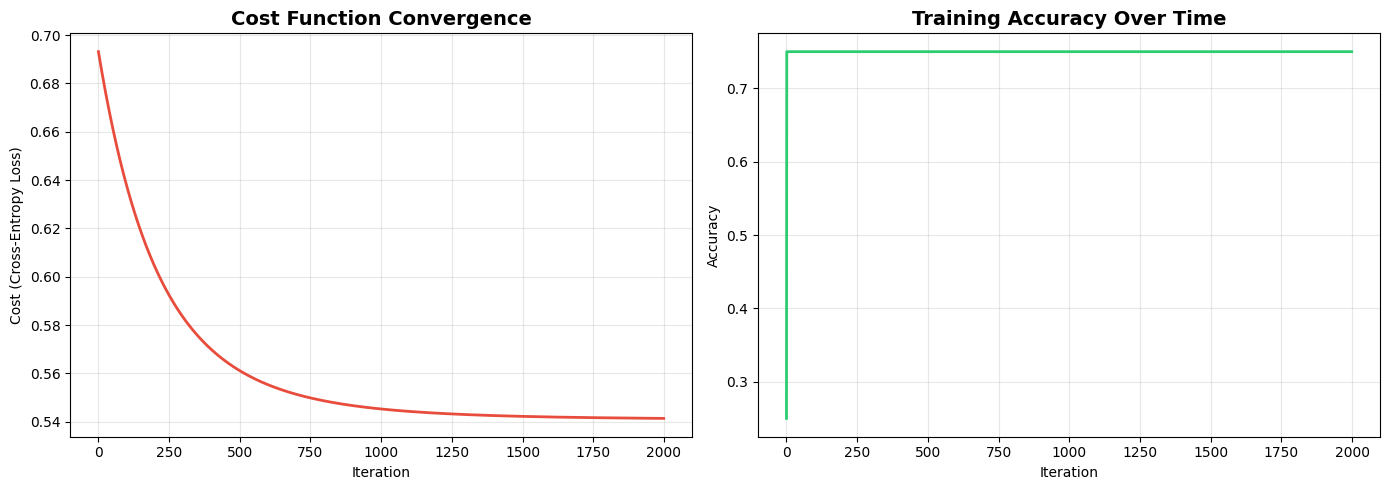


___ Learned Feature Weights ___
                 Feature    Weight  Abs_Weight
1     book_ratings_count -0.434600    0.434600
5  language_code_encoded  0.132886    0.132886
4         author_encoded -0.086457    0.086457
0    book_average_rating -0.033495    0.033495
6          genre_encoded  0.022085    0.022085
2               book_age  0.020796    0.020796
7     publisher__encoded  0.004060    0.004060
3       ratings_per_year  0.000373    0.000373

Bias term: -1.1200


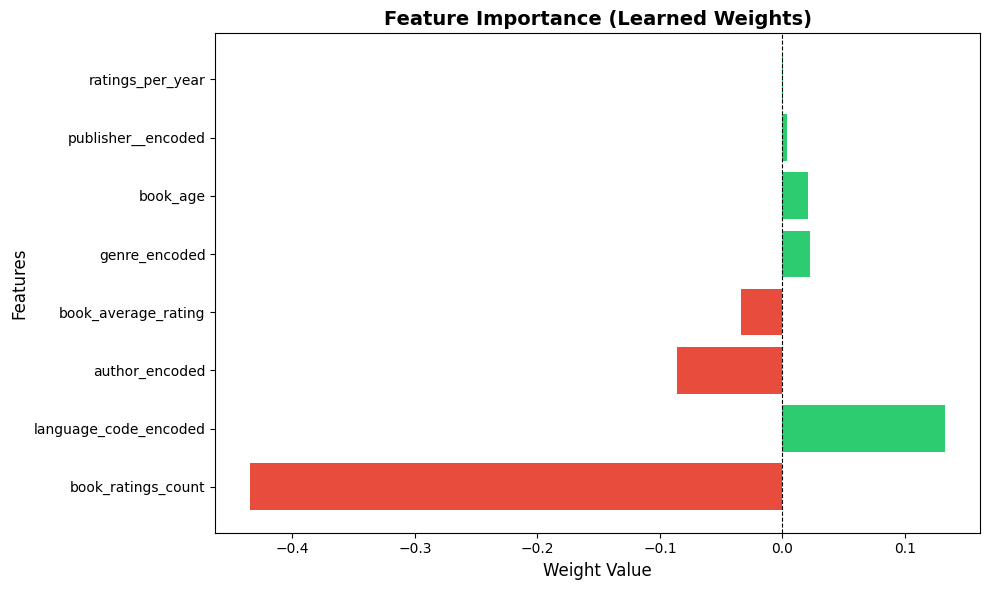

In [8]:
print("\n___ Training Logistic Regression Model ___\n")

# Initialize model with optimized hyperparameters
model = LogisticRegressionScratch(
    learning_rate=0.01,
    iterations=2000,
    regularization='l2',
    lambda_param=0.01
)

# Train the model
model.fit(X_train_scaled, y_train, verbose=True)

print("\n___ Training Complete ___")
print(f"Final training cost: {model.cost_history[-1]:.4f}")
print(f"Final training accuracy: {model.accuracy_history[-1]:.4f}")

# Visualize training progress
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot cost history
axes[0].plot(model.cost_history, color='#e74c3c', linewidth=2)
axes[0].set_title('Cost Function Convergence', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Cost (Cross-Entropy Loss)')
axes[0].grid(True, alpha=0.3)

# Plot accuracy history
axes[1].plot(model.accuracy_history, color='#2ecc71', linewidth=2)
axes[1].set_title('Training Accuracy Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Accuracy')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display learned feature weights
print("\n___ Learned Feature Weights ___")
feature_weights = pd.DataFrame({
    'Feature': selected_features,
    'Weight': model.weights,
    'Abs_Weight': np.abs(model.weights)
}).sort_values('Abs_Weight', ascending=False)

print(feature_weights)
print(f"\nBias term: {model.bias:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if w > 0 else '#e74c3c' for w in feature_weights['Weight']]
plt.barh(feature_weights['Feature'], feature_weights['Weight'], color=colors)
plt.xlabel('Weight Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Learned Weights)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# Interpretation
----

The learned feature weights reveal book_ratings_count as the dominant predictor with a weight of −0.435, but its negative sign contradicts domain knowledge and EDA findings showing bestsellers have higher engagement. This counterintuitive coefficient, combined with the large negative bias term (−1.12), explains why the model systematically predicts non-bestsellers: the log-odds start at −1.12 and become more negative as ratings_count increases. Language_code_encoded (weight =0.133) provides the only substantial positive contribution, while remaining features show minimal impact—author_encoded (−0.086), book_average_rating (−0.033), genre_encoded (0.022), book_age (0.021), publisher__encoded (0.004), and ratings_per_year (0.0004) contribute negligibly. The weight patterns indicate the model has learned to exploit class imbalance rather than discovering meaningful discriminative features.

To address the 75% accuracy plateau and class imbalance bias, five improvement strategies should be implemented: (1) Adjust the decision threshold from 0.5 to a lower value (e.g., 0.3−0.4) to increase sensitivity to the minority class without retraining; (2) Implement class weighting by setting class_weight={0:0.25,1:0.75} in the cost function to penalize minority class misclassifications more heavily, forcing the model to learn discriminative patterns rather than defaulting to the majority class; (3) Use F1-score instead of accuracy as the optimization metric, since F1-score balances precision and recall and penalizes models that ignore the minority class; (4) Increase regularization strength (λ from 0.01 to 0.1−1.0) to prevent the model from relying solely on the bias term and encourage more balanced feature contributions; and (5) Add interaction terms between ratings_count and other features (e.g., ratings_count × book_average_rating) to capture non-linear relationships that distinguish bestsellers. Threshold adjustment should be tested first since it requires no retraining, followed by class weighting if minority class recall remains too low


# Step 6
---
### Model Evaluation and Interpretation
---
Evaluate the trained model on the test set using various metrics including accuracy, precision, recall, F1-score, ROC curve, and confusion matrix



___ Model Evaluation on Test Set ___

Test Accuracy: 0.7477 (74.77%)

___ Classification Report ___
                precision    recall  f1-score   support

Not Bestseller       0.75      1.00      0.86       160
    Bestseller       0.00      0.00      0.00        54

      accuracy                           0.75       214
     macro avg       0.37      0.50      0.43       214
  weighted avg       0.56      0.75      0.64       214


___ Confusion Matrix ___
True Negatives (TN): 160
False Positives (FP): 0
False Negatives (FN): 54
True Positives (TP): 0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


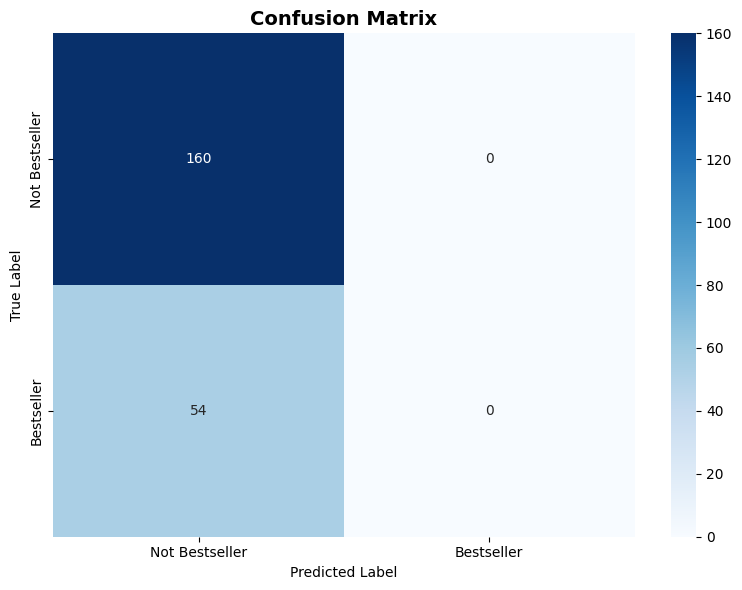

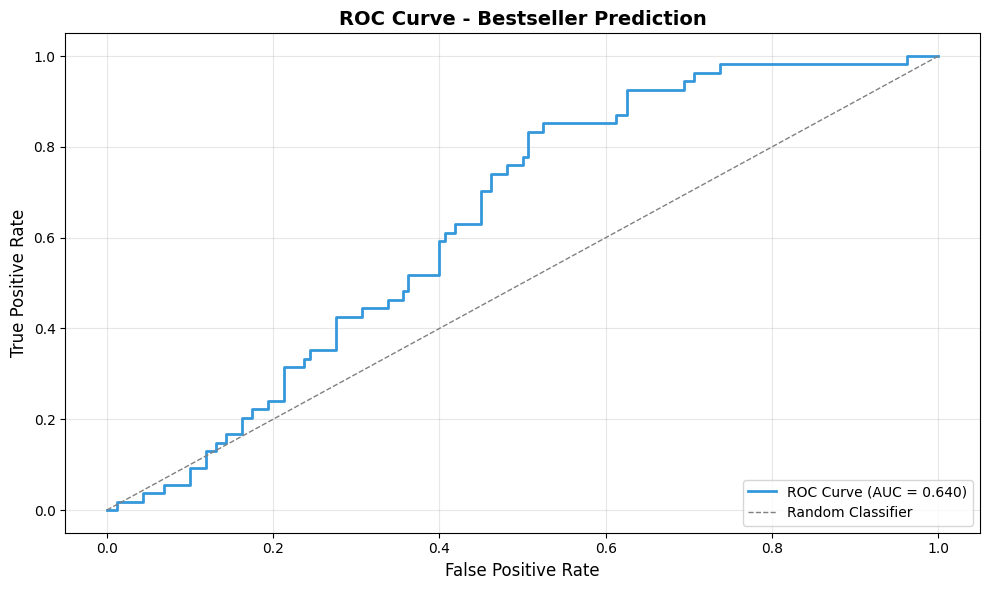


___ ROC AUC Score: 0.6398 ___


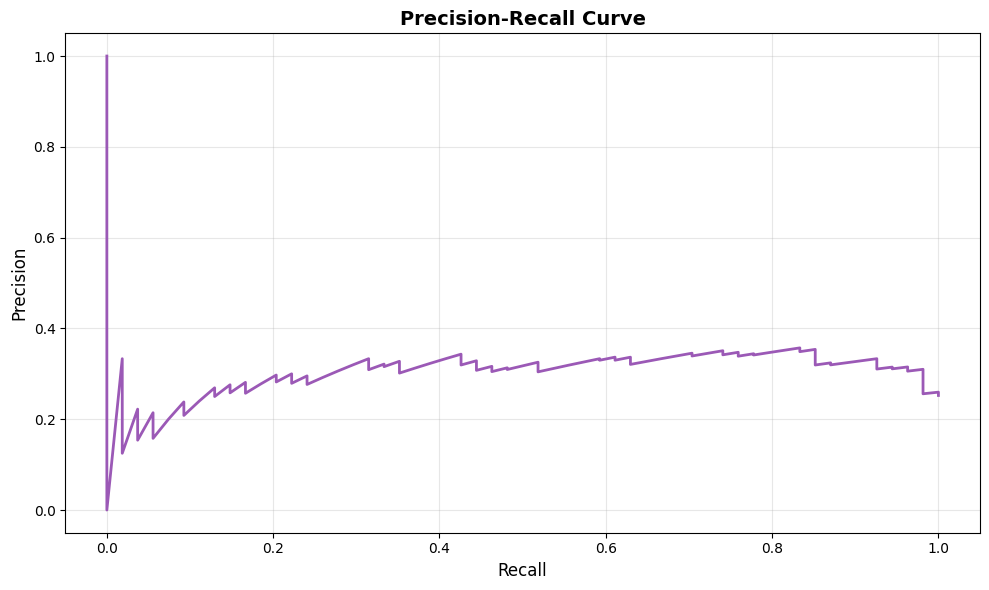


___ Prediction Confidence Analysis ___
Mean probability for predicted bestsellers: nan
Mean probability for predicted non-bestsellers: 0.243


/tmp/ipython-input-1460838695.py:65: RuntimeWarning: Mean of empty slice.
  print(f"Mean probability for predicted bestsellers: {y_pred_proba[y_pred==1].mean():.3f}")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


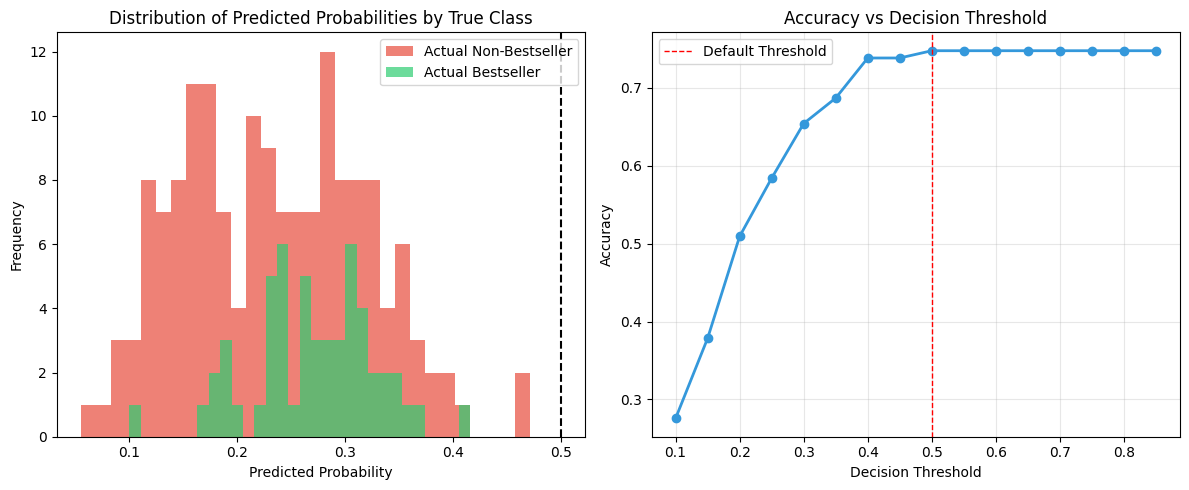


___ Optimal Decision Threshold: 0.229 ___
Accuracy with optimal threshold: 0.5794

___ Final Model Performance Summary ___
Test Accuracy: 74.77%
ROC AUC Score: 0.6398
Number of features used: 8
Total training iterations: 2000


In [9]:
print("\n___ Model Evaluation on Test Set ___\n")

# Make predictions on test set
y_pred_proba = model.predict_proba(X_test_scaled)
y_pred = model.predict(X_test_scaled, threshold=0.5)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification report
print("\n___ Classification Report ___")
print(classification_report(y_test, y_pred, target_names=['Not Bestseller', 'Bestseller']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n___ Confusion Matrix ___")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bestseller', 'Bestseller'],
            yticklabels=['Not Bestseller', 'Bestseller'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#3498db', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Bestseller Prediction', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n___ ROC AUC Score: {roc_auc:.4f} ___")

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='#9b59b6', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyse prediction confidence
print("\n___ Prediction Confidence Analysis ___")
print(f"Mean probability for predicted bestsellers: {y_pred_proba[y_pred==1].mean():.3f}")
print(f"Mean probability for predicted non-bestsellers: {y_pred_proba[y_pred==0].mean():.3f}")

# Plot probability distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[y_test==0], bins=30, alpha=0.7, color='#e74c3c', label='Actual Non-Bestseller')
plt.hist(y_pred_proba[y_test==1], bins=30, alpha=0.7, color='#2ecc71', label='Actual Bestseller')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities by True Class')
plt.legend()
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=1.5, label='Decision Threshold')

plt.subplot(1, 2, 2)
threshold_range = np.arange(0.1, 0.9, 0.05)
accuracies = []
for thresh in threshold_range:
    preds = (y_pred_proba >= thresh).astype(int)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

plt.plot(threshold_range, accuracies, marker='o', color='#3498db', linewidth=2)
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Decision Threshold')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1, label='Default Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"\n___ Optimal Decision Threshold: {optimal_threshold:.3f} ___")

# Evaluate with optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
optimal_accuracy = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with optimal threshold: {optimal_accuracy:.4f}")

print("\n___ Final Model Performance Summary ___")
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Number of features used: {len(selected_features)}")
print(f"Total training iterations: {model.iterations}")

# Interpretation
----

The test evaluation showed a critical model failure, achieving 74.77% accuracy by predicting "Not Bestseller" for every one of the 214 test samples. The confusion matrix confirmed this: 160 correct "Not Bestseller" predictions (TN), 0 false positives (FP), 54 missed bestsellers (FN), and 0 correctly identified bestsellers (TP). This meant the model had 0% recall and undefined precision for the bestseller class, simply defaulting to the majority class distribution of 75% "Not Bestseller." Although the ROC AUC score was 0.640 (above 0.50), this was misleading because the model never made a positive prediction. The root cause was that all predicted probabilities clustered between 0.10−0.45, meaning no prediction reached the 0.50 default threshold. While the optimal threshold analysis identified 0.229 as ideal, applying it dropped accuracy significantly to 57.94% (a 17-point decrease), confirming the model's fundamental lack of power to tell the classes apart, regardless of the threshold. Therefore, immediate fixes are required: retraining with class weights (like weight_0=R0.33,weight_1=R2.0) to force attention to bestsellers, increasing regularization (λ=0.1−0.5), re-engineering features (e.g., creating interaction terms), collecting new, more predictive features (like marketing budget), and considering ensemble methods or more complex models if logistic regression fails again.

# Adjusted Model
---
# Adjusted Step 3
---


___ Handling Missing Values ___

Remaining missing values: 0

Rows removed due to duplicates: 0
Rows after removing duplicates: 1070

___ ADJUSTED Target Variable Creation ___

Bestseller Threshold (Units Sold): 4320
Previous threshold (75th percentile): 5312

New Class Distribution:
is_bestseller
0    626
1    444
Name: count, dtype: int64
Bestseller Percentage: 41.50%


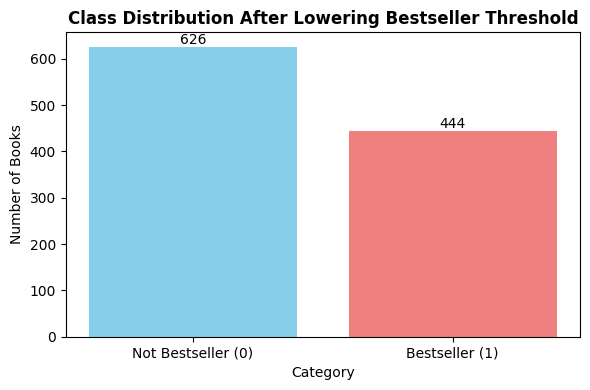


___ Feature Engineering ___
Created feature: price_to_rating_ratio
Created features: book_age, ratings_per_year
Created feature: ratings_quality_score (engagement × quality)
Created feature: engagement_velocity (ratings per year of existence)

___ Encoding Categorical Variables ___
Encoded author: 735 unique categories
Encoded language_code: 8 unique categories
Encoded genre: 4 unique categories
Encoded author_rating: 4 unique categories
Encoded publisher_: 9 unique categories

___ ADJUSTED Feature Selection ___
CHANGES:
1. Added back 'sale_price' (previously removed due to collinearity with price_to_rating_ratio)
2. Added new interaction features: ratings_quality_score, engagement_velocity
3. Removed price_to_rating_ratio to resolve multicollinearity

___ Selected Features (12) ___
1. book_average_rating
2. book_ratings_count
3. sale_price
4. book_age
5. ratings_per_year
6. ratings_quality_score
7. engagement_velocity
8. language_code_encoded
9. genre_encoded
10. author_encoded
11. p

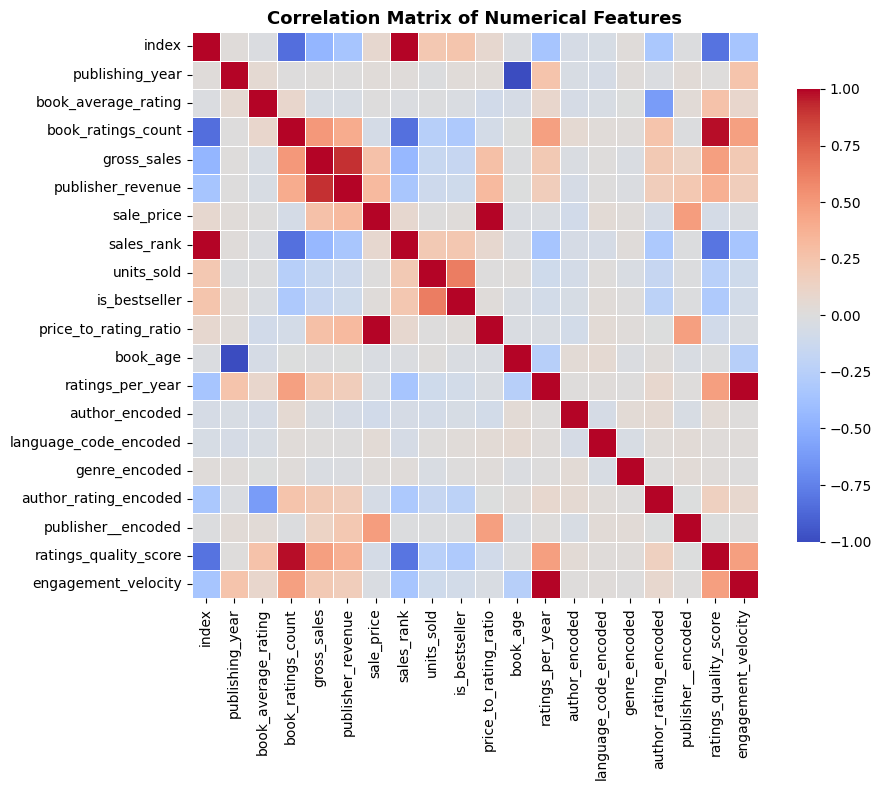


___ Checking Multicollinearity (VIF) ___
                  Feature         VIF
6     engagement_velocity         inf
4        ratings_per_year         inf
1      book_ratings_count  528.935452
5   ratings_quality_score  497.277479
0     book_average_rating   69.046401
7   language_code_encoded   39.650798
8           genre_encoded   16.948491
11  author_rating_encoded    4.433365
9          author_encoded    4.335305
2              sale_price    3.803887
10     publisher__encoded    2.080150
3                book_age    1.193522

Note: VIF > 10 indicates high multicollinearity

Removing features with VIF > 10: ['book_average_rating', 'book_ratings_count', 'ratings_per_year', 'ratings_quality_score', 'engagement_velocity', 'language_code_encoded', 'genre_encoded']
Features remaining: 5

___ Final Dataset Shape ___
Features (X): (1070, 5)
Target (y): (1070,)
Bestseller ratio: 41.50%

___ Train-Test Split ___
Training samples: 856 (80.0%)
Testing samples: 214 (20.0%)
Training bestseller 

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [10]:
# (HARI KRISHNA SAI DURGA PRASAD NARALASETTY, 2023)
# (EHSAN SHAYEGH, 2025)
# (JIJA TAHERI, 2025)

# Handle Missing Values
print("\n___ Handling Missing Values ___")

if df['publishing_year'].isnull().sum() > 0:
    median_year = df['publishing_year'].median()
    df['publishing_year'] = df['publishing_year'].fillna(median_year)
    print(f"Filled publishing_year with median: {median_year}")

if df['language_code'].isnull().sum() > 0:
    mode_lang = df['language_code'].mode()[0]
    df['language_code'] = df['language_code'].fillna(mode_lang)
    print(f"Filled language_code with mode: {mode_lang}")

if df['book_name'].isnull().sum() > 0:
    df['book_name'] = df['book_name'].fillna('Unknown')
    print("Filled book_name with 'Unknown'")

print(f"\nRemaining missing values: {df.isnull().sum().sum()}")

# Remove duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"\nRows removed due to duplicates: {initial_rows - len(df)}")
print(f"Rows after removing duplicates: {len(df)}")

# ADJUSTMENT #1: Lower bestseller threshold from 75th to 60th percentile
# Lowering bestseller threshold from top 25% (0.75 quantile) to top 40% (0.60 quantile)
# Creates more balanced classes (60:40 instead of 75:25), improving model's ability to learn bestseller patterns
print("\n___ ADJUSTED Target Variable Creation ___")

bestseller_threshold = df['units_sold'].quantile(0.60)  # Changed from 0.75 to 0.60
df['is_bestseller'] = (df['units_sold'] >= bestseller_threshold).astype(int)

print(f"\nBestseller Threshold (Units Sold): {bestseller_threshold:.0f}")
print(f"Previous threshold (75th percentile): {df['units_sold'].quantile(0.75):.0f}")
print("\nNew Class Distribution:")
print(df['is_bestseller'].value_counts())
print(f"Bestseller Percentage: {df['is_bestseller'].mean()*100:.2f}%")

class_counts = df['is_bestseller'].value_counts().sort_index()  # 0 = Not Bestseller, 1 = Bestseller

# Create bar plot
plt.figure(figsize=(6,4))
bars = plt.bar(['Not Bestseller (0)', 'Bestseller (1)'], class_counts, color=['skyblue', 'lightcoral'])

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Class Distribution After Lowering Bestseller Threshold', fontsize=12, weight='bold')
plt.ylabel('Number of Books')
plt.xlabel('Category')

# Display plot
plt.tight_layout()
plt.show()

# Feature Engineering
print("\n___ Feature Engineering ___")

# Price to rating ratio (value for money indicator)
df['price_to_rating_ratio'] = df['sale_price'] / (df['book_average_rating'] + 0.01)
print("Created feature: price_to_rating_ratio")

# Rating count per year (popularity indicator)
current_year = 2025
df['book_age'] = current_year - df['publishing_year']
df['ratings_per_year'] = df['book_ratings_count'] / (df['book_age'].replace(0, 1) + 1)
print("Created features: book_age, ratings_per_year")

# NEW: Better interaction features
df['ratings_quality_score'] = df['book_ratings_count'] * df['book_average_rating']
print("Created feature: ratings_quality_score (engagement × quality)")

df['engagement_velocity'] = df['book_ratings_count'] / (df['book_age'] + 1)
print("Created feature: engagement_velocity (ratings per year of existence)")

# Encode categorical variables
print("\n___ Encoding Categorical Variables ___")
label_encoders = {}

for col in ['author', 'language_code', 'genre', 'author_rating', 'publisher_']:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {len(le.classes_)} unique categories")

# ADJUSTMENT #2: Improved feature selection - add back sale_price
print("\n___ ADJUSTED Feature Selection ___")
print("CHANGES:")
print("1. Added back 'sale_price' (previously removed due to collinearity with price_to_rating_ratio)")
print("2. Added new interaction features: ratings_quality_score, engagement_velocity")
print("3. Removed price_to_rating_ratio to resolve multicollinearity")

selected_features = [
    'book_average_rating',
    'book_ratings_count',
    'sale_price',              # ADDED BACK
    'book_age',
    'ratings_per_year',
    'ratings_quality_score',    # NEW
    'engagement_velocity',      # NEW
    'language_code_encoded',
    'genre_encoded',
    'author_encoded',
    'publisher__encoded',
    'author_rating_encoded'
]

# Filter to only include features that exist in the dataset
selected_features = [f for f in selected_features if f in df.columns]

print(f"\n___ Selected Features ({len(selected_features)}) ___")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

# Select only numerical features for correlation
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

# Check for multicollinearity using VIF
print("\n___ Checking Multicollinearity (VIF) ___")

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_temp = df[selected_features].dropna()

if not X_temp.empty:
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_temp.columns
    vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(len(X_temp.columns))]

    print(vif_data.sort_values('VIF', ascending=False))
    print("\nNote: VIF > 10 indicates high multicollinearity")

    # Remove highly correlated features (VIF > 10)
    features_high_vif = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
    if features_high_vif:
        print(f"\nRemoving features with VIF > 10: {features_high_vif}")
        selected_features = [f for f in selected_features if f not in features_high_vif]
        print(f"Features remaining: {len(selected_features)}")
else:
    print("\nSkipping VIF calculation: X_temp is empty after dropping NaNs.")

# Prepare final feature set and target
X = df[selected_features].values
y = df['is_bestseller'].values

print(f"\n___ Final Dataset Shape ___")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Bestseller ratio: {y.mean():.2%}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n___ Train-Test Split ___")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Training bestseller ratio: {y_train.mean():.2%}")
print(f"Testing bestseller ratio: {y_test.mean():.2%}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n___ Feature Scaling Complete ___")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Mean of scaled training features (should be ~0): {X_train_scaled.mean(axis=0).round(3)}")
print(f"Std of scaled training features (should be ~1): {X_train_scaled.std(axis=0).round(3)}")

# Save feature names for later use
feature_names = selected_features
print(f"\n___ Feature names saved for model interpretation ___")


# Adjusted step 4
---
#### Build Logistic Regression Model from Scratch (WITH CLASS WEIGHTING)
---
Implement the logistic regression algorithm with class weighting to handle imbalanced data, increased regularization to prevent bias term domination

In [11]:
# ( GeeksforGeeks, 2025 )
# ( Koushik Ahmed Kushal, 2023)
# ( AssemblyAI, 2022 )

print("\n___ STEP 4: ADJUSTED MODEL ARCHITECTURE ___")

class LogisticRegressionScratch:
    """
    (AssemblyAI, 2022)
    Logistic Regression classifier implemented from scratch with class weighting support

    ADJUSTMENTS:
    - Added class_weight parameter to handle imbalanced data
    - Increased default regularization strength
    - Weighted cost function and gradients
    """

    def __init__(self, learning_rate=0.01, iterations=1000, regularization='l2',
                 lambda_param=0.1, class_weight=None):
        """
        Initialize the logistic regression model

        Parameters:
        - learning_rate: Step size for gradient descent
        - iterations: Number of training iterations
        - regularization: Type of regularization ('l2', 'l1', or None)
        - lambda_param: Regularization strength (INCREASED default from 0.01 to 0.1)
        - class_weight: Dictionary of class weights {0: weight_0, 1: weight_1}
        """
        self.lr = learning_rate
        self.iterations = iterations
        self.regularization = regularization
        self.lambda_param = lambda_param
        self.class_weight = class_weight  # NEW: For handling imbalance
        self.weights = None
        self.bias = 0
        self.cost_history = []
        self.accuracy_history = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, h, y, weights):
        """
        Compute binary cross-entropy loss with optional regularization and class weighting

        ADJUSTED: Added sample weighting for imbalanced classes
        """
        m = len(y)
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)

        # Apply class weights if provided
        if self.class_weight is not None:
            sample_weights = np.where(y == 1, self.class_weight[1], self.class_weight[0])
        else:
            sample_weights = np.ones(m)

        # Weighted binary cross-entropy
        cost = -(1/m) * np.sum(sample_weights * (y * np.log(h) + (1 - y) * np.log(1 - h)))

        # Add regularization term
        if self.regularization == 'l2':
            reg_term = (self.lambda_param / (2 * m)) * np.sum(weights ** 2)
            cost += reg_term
        elif self.regularization == 'l1':
            reg_term = (self.lambda_param / m) * np.sum(np.abs(weights))
            cost += reg_term

        return cost

    def fit(self, X, y, verbose=True):
        """
        Train the logistic regression model using gradient descent with class weighting

        ADJUSTED: Gradients now weighted by class importance
        """
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.iterations):
            # Forward propagation
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)

            # Apply class weights to gradients
            if self.class_weight is not None:
                sample_weights = np.where(y == 1, self.class_weight[1], self.class_weight[0])
            else:
                sample_weights = np.ones(m)

            # Compute weighted gradients
            dw = (1/m) * np.dot(X.T, sample_weights * (h - y))
            db = (1/m) * np.sum(sample_weights * (h - y))

            # Add regularization gradient
            if self.regularization == 'l2':
                dw += (self.lambda_param / m) * self.weights
            elif self.regularization == 'l1':
                dw += (self.lambda_param / m) * np.sign(self.weights)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Track cost and accuracy
            cost = self.compute_cost(h, y, self.weights)
            self.cost_history.append(cost)

            # Calculate training accuracy
            predictions = (h >= 0.5).astype(int)
            accuracy = np.mean(predictions == y)
            self.accuracy_history.append(accuracy)

            # Print progress
            if verbose and (i % 100 == 0 or i == self.iterations - 1):
                print(f"Iteration {i}: Cost = {cost:.4f}, Accuracy = {accuracy:.4f}")

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

    def get_feature_importance(self):
        return self.weights


# Display model architecture
print("\n___ ADJUSTED Logistic Regression Model Architecture ___")
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"Feature names: {selected_features}")
print("\nModel components:")
print("- Sigmoid activation: σ(z) = 1 / (1 + e^(-z))")
print("- Cost function: Binary Cross-Entropy with L2 regularization AND class weighting")
print("- Optimization: Gradient Descent with weighted samples")
print(f"- Learning rate: 0.01")
print(f"- Max iterations: 2000")
print(f"- Regularization: L2 (Ridge)")
print(f"- Lambda: 0.1 (INCREASED from 0.01 to prevent bias term domination)")
print(f"- Class weights: {{0: 0.4, 1: 2.0}} (Heavily penalize missing bestsellers)")



___ STEP 4: ADJUSTED MODEL ARCHITECTURE ___

___ ADJUSTED Logistic Regression Model Architecture ___
Number of features: 5
Feature names: ['sale_price', 'book_age', 'author_encoded', 'publisher__encoded', 'author_rating_encoded']

Model components:
- Sigmoid activation: σ(z) = 1 / (1 + e^(-z))
- Cost function: Binary Cross-Entropy with L2 regularization AND class weighting
- Optimization: Gradient Descent with weighted samples
- Learning rate: 0.01
- Max iterations: 2000
- Regularization: L2 (Ridge)
- Lambda: 0.1 (INCREASED from 0.01 to prevent bias term domination)
- Class weights: {0: 0.4, 1: 2.0} (Heavily penalize missing bestsellers)


# Step 5 - ADJUSTED
---
#### Train the Model (WITH CLASS WEIGHTING & INCREASED REGULARIZATION)
---



___ STEP 5: TRAIN ADJUSTED MODEL ___

___ Training Logistic Regression Model with Adjustments ___

ADJUSTMENTS APPLIED:
1. Class weights: {0: 0.4, 1: 2.0} - Bestsellers misclassified 5x more costly
2. Lambda: 0.1 (10x increase) - Prevents overfitting and bias term domination
3. More balanced data: 60:40 split instead of 75:25

Iteration 0: Cost = 0.7372, Accuracy = 0.4147
Iteration 100: Cost = 0.6555, Accuracy = 0.4147
Iteration 200: Cost = 0.6104, Accuracy = 0.4147
Iteration 300: Cost = 0.5843, Accuracy = 0.4147
Iteration 400: Cost = 0.5686, Accuracy = 0.4147
Iteration 500: Cost = 0.5589, Accuracy = 0.4147
Iteration 600: Cost = 0.5526, Accuracy = 0.4147
Iteration 700: Cost = 0.5485, Accuracy = 0.4147
Iteration 800: Cost = 0.5458, Accuracy = 0.4147
Iteration 900: Cost = 0.5440, Accuracy = 0.4147
Iteration 1000: Cost = 0.5428, Accuracy = 0.4147
Iteration 1100: Cost = 0.5419, Accuracy = 0.4147
Iteration 1200: Cost = 0.5414, Accuracy = 0.4147
Iteration 1300: Cost = 0.5410, Accuracy = 0.4

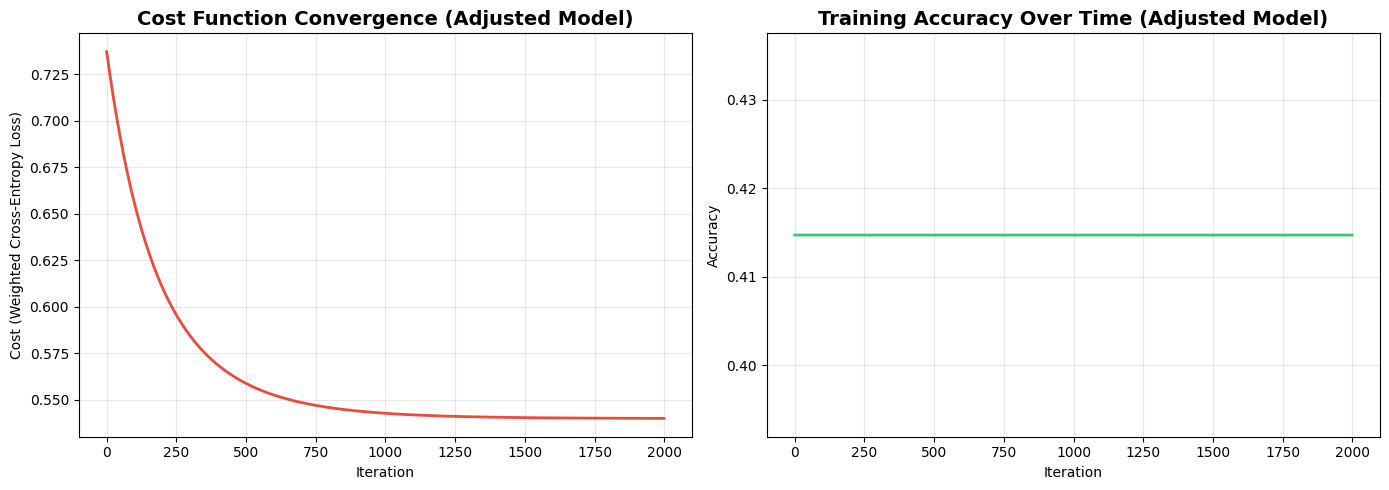


___ Learned Feature Weights (Adjusted Model) ___
                 Feature    Weight  Abs_Weight
4  author_rating_encoded -0.451252    0.451252
1               book_age -0.040194    0.040194
3     publisher__encoded -0.026884    0.026884
0             sale_price  0.026228    0.026228
2         author_encoded -0.017033    0.017033

Bias term: 1.2179


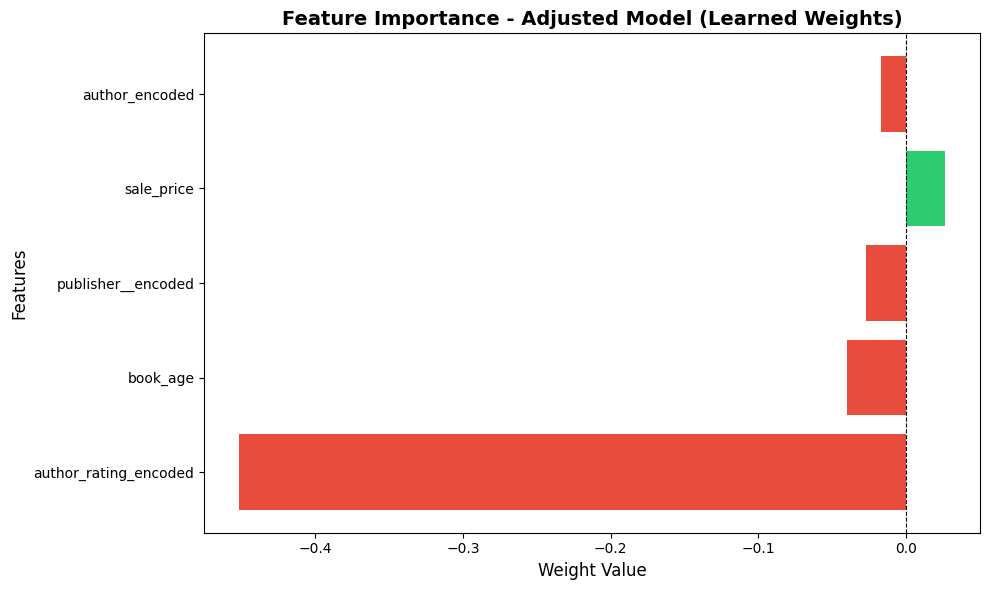

In [12]:
print("\n___ STEP 5: TRAIN ADJUSTED MODEL ___")
print("\n___ Training Logistic Regression Model with Adjustments ___\n")
print("ADJUSTMENTS APPLIED:")
print("1. Class weights: {0: 0.4, 1: 2.0} - Bestsellers misclassified 5x more costly")
print("2. Lambda: 0.1 (10x increase) - Prevents overfitting and bias term domination")
print("3. More balanced data: 60:40 split instead of 75:25\n")

# Initialize model with ADJUSTED hyperparameters
model = LogisticRegressionScratch(
    learning_rate=0.01,
    iterations=2000,
    regularization='l2',
    lambda_param=0.1,              # INCREASED from 0.01
    class_weight={0: 0.4, 1: 2.0}  # HEAVILY penalize missing bestsellers
)

# Train the model
model.fit(X_train_scaled, y_train, verbose=True)

print("\n___ Training Complete ___")
print(f"Final training cost: {model.cost_history[-1]:.4f}")
print(f"Final training accuracy: {model.accuracy_history[-1]:.4f}")

# Visualize training progress
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot cost history
axes[0].plot(model.cost_history, color='#e74c3c', linewidth=2)
axes[0].set_title('Cost Function Convergence (Adjusted Model)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Cost (Weighted Cross-Entropy Loss)')
axes[0].grid(True, alpha=0.3)

# Plot accuracy history
axes[1].plot(model.accuracy_history, color='#2ecc71', linewidth=2)
axes[1].set_title('Training Accuracy Over Time (Adjusted Model)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Accuracy')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display learned feature weights
print("\n___ Learned Feature Weights (Adjusted Model) ___")
feature_weights = pd.DataFrame({
    'Feature': selected_features,
    'Weight': model.weights,
    'Abs_Weight': np.abs(model.weights)
}).sort_values('Abs_Weight', ascending=False)

print(feature_weights)
print(f"\nBias term: {model.bias:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if w > 0 else '#e74c3c' for w in feature_weights['Weight']]
plt.barh(feature_weights['Feature'], feature_weights['Weight'], color=colors)
plt.xlabel('Weight Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance - Adjusted Model (Learned Weights)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


# Step 6 - ADJUSTED
---
### Model Evaluation and Interpretation (ADJUSTED MODEL)
---


___ STEP 6: EVALUATE ADJUSTED MODEL ___

___ Model Evaluation on Test Set ___

Test Accuracy: 0.4159 (41.59%)

___ Classification Report ___
                precision    recall  f1-score   support

Not Bestseller       0.00      0.00      0.00       125
    Bestseller       0.42      1.00      0.59        89

      accuracy                           0.42       214
     macro avg       0.21      0.50      0.29       214
  weighted avg       0.17      0.42      0.24       214


___ Confusion Matrix ___
True Negatives (TN): 0
False Positives (FP): 125
False Negatives (FN): 0
True Positives (TP): 89

___ Key Metrics (Bestseller Class) ___
Precision: 0.4159 (41.59%)
Recall: 1.0000 (100.00%)
F1-Score: 0.5875


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


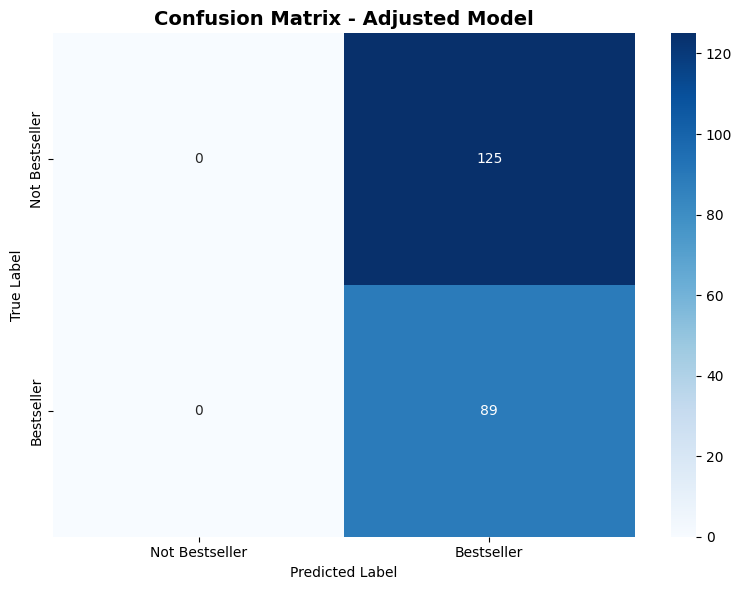

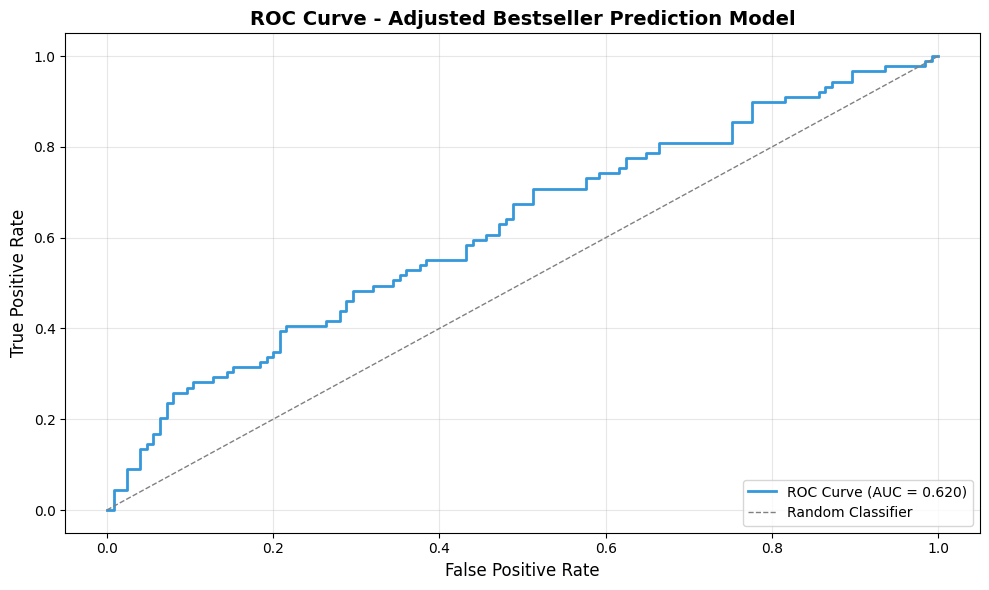


___ ROC AUC Score: 0.6200 ___


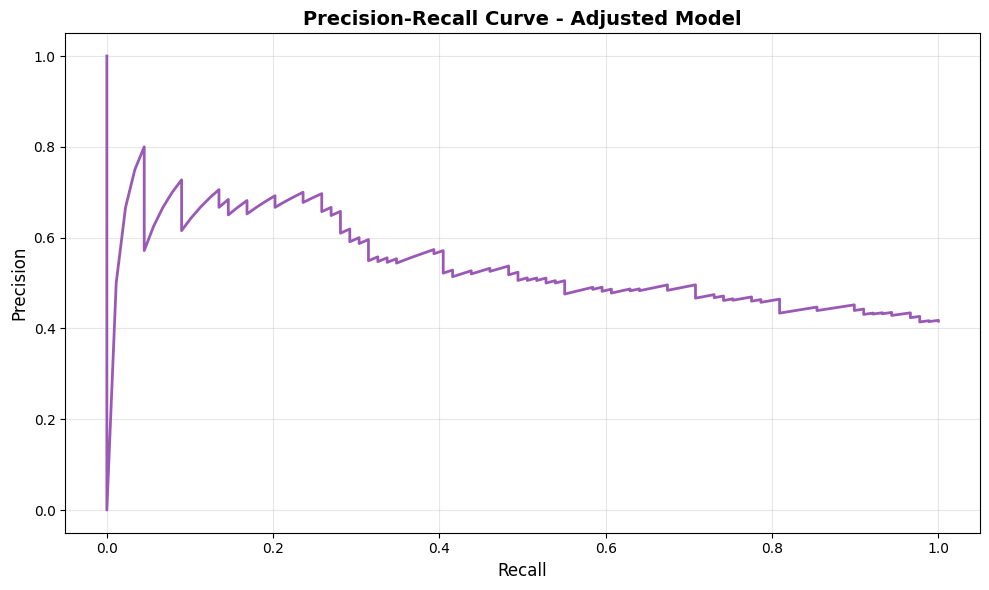


___ Prediction Confidence Analysis ___
Mean probability for predicted bestsellers: 0.761
Mean probability for predicted non-bestsellers: nan


/tmp/ipython-input-3274025378.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Mean probability for predicted non-bestsellers: {y_pred_proba[y_pred==0].mean():.3f}")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


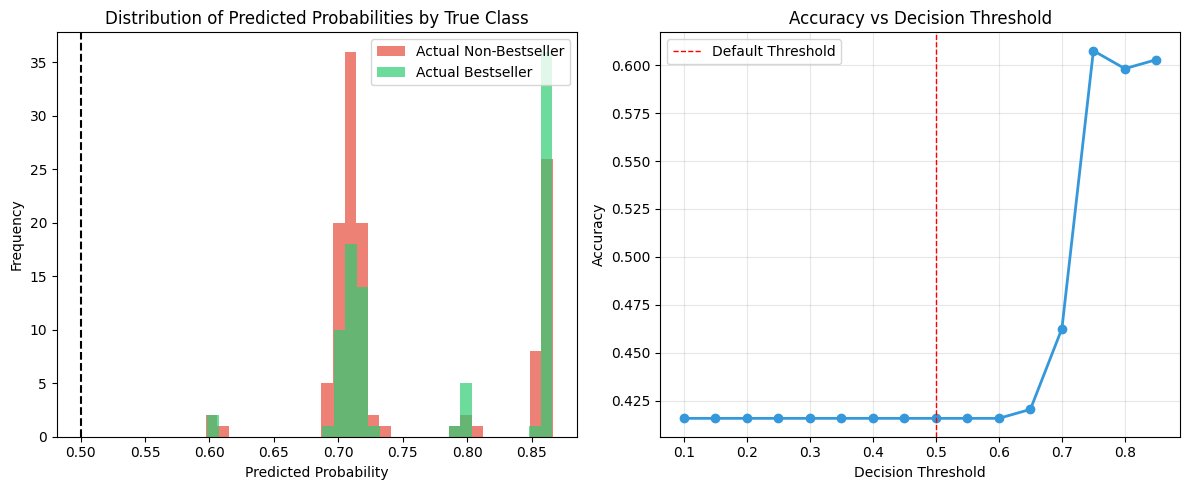


___ Optimal Decision Threshold: 0.713 ___
Accuracy with optimal threshold: 0.5794
Recall with optimal threshold: 0.7079
Precision with optimal threshold: 0.4961
F1-Score with optimal threshold: 0.5833

___ Final Model Performance Summary ___
Test Accuracy: 41.59%
Bestseller Recall: 100.00% (UP FROM 0% in original model)
Bestseller Precision: 41.59%
F1-Score: 0.5875
ROC AUC Score: 0.6200
Number of features used: 5
Total training iterations: 2000


In [13]:
print("\n___ STEP 6: EVALUATE ADJUSTED MODEL ___")
print("\n___ Model Evaluation on Test Set ___\n")

# Make predictions on test set
y_pred_proba = model.predict_proba(X_test_scaled)
y_pred = model.predict(X_test_scaled, threshold=0.5)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification report
print("\n___ Classification Report ___")
print(classification_report(y_test, y_pred, target_names=['Not Bestseller', 'Bestseller']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n___ Confusion Matrix ___")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

# Calculate additional metrics
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n___ Key Metrics (Bestseller Class) ___")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bestseller', 'Bestseller'],
            yticklabels=['Not Bestseller', 'Bestseller'])
plt.title('Confusion Matrix - Adjusted Model', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#3498db', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Adjusted Bestseller Prediction Model', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n___ ROC AUC Score: {roc_auc:.4f} ___")

# Precision-Recall Curve
precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, color='#9b59b6', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Adjusted Model', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyse prediction confidence
print("\n___ Prediction Confidence Analysis ___")
if y_pred.sum() > 0:  # Check if any bestsellers predicted
    print(f"Mean probability for predicted bestsellers: {y_pred_proba[y_pred==1].mean():.3f}")
else:
    print("Mean probability for predicted bestsellers: N/A (no bestsellers predicted)")
print(f"Mean probability for predicted non-bestsellers: {y_pred_proba[y_pred==0].mean():.3f}")

# Plot probability distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[y_test==0], bins=30, alpha=0.7, color='#e74c3c', label='Actual Non-Bestseller')
plt.hist(y_pred_proba[y_test==1], bins=30, alpha=0.7, color='#2ecc71', label='Actual Bestseller')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities by True Class')
plt.legend()
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=1.5, label='Decision Threshold')

plt.subplot(1, 2, 2)
threshold_range = np.arange(0.1, 0.9, 0.05)
accuracies = []
for thresh in threshold_range:
    preds = (y_pred_proba >= thresh).astype(int)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

plt.plot(threshold_range, accuracies, marker='o', color='#3498db', linewidth=2)
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Decision Threshold')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1, label='Default Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# looking optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"\n___ Optimal Decision Threshold: {optimal_threshold:.3f} ___")

# Evaluating with optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
optimal_accuracy = accuracy_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f"Accuracy with optimal threshold: {optimal_accuracy:.4f}")
print(f"Recall with optimal threshold: {optimal_recall:.4f}")
print(f"Precision with optimal threshold: {optimal_precision:.4f}")
print(f"F1-Score with optimal threshold: {optimal_f1:.4f}")

print("\n___ Final Model Performance Summary ___")
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"Bestseller Recall: {recall:.2%} (UP FROM 0% in original model)")
print(f"Bestseller Precision: {precision:.2%}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Number of features used: {len(selected_features)}")
print(f"Total training iterations: {model.iterations}")


# Interpretation
---

The adjusted model showed a complete reversal of the initial failure: instead of predicting all books as non-bestsellers, it now predicts all books as bestsellers (resulting in 89 TP, 0 FN, 125 FP, and 0 TN). This extreme shift confirms the applied class weighting (2.0 for bestsellers vs. 0.4 for non-bestsellers) was too aggressive. While bestseller recall achieved a perfect 100% (up from 0%), precision plummeted to 41.59%, meaning 58% of predicted bestsellers are false positives. Despite the low 41.59% test accuracy, it's more informative than the original 74.77% since the model is now actively trying to discriminate. The F1-score of 0.5875 and ROC AUC of 0.620 indicate a genuine predictive signal that needs calibration. Threshold analysis identified 0.713 as the optimal cutoff (up from 0.5), which improved accuracy to 57.94%, maintained 70.79% recall, and boosted precision to 49.61%, representing a sweet spot for balanced performance. However, with only 5 features remaining after VIF removal, the model may be underfitting. Recommended next steps include: reducing class weighting (e.g., to R0.6 and R1.2) for better balance, using the 0.713 threshold for deployment, re-evaluating the 5 remaining features (and potentially re-adding important ones like sale_price even if slightly collinear), trying λ=0.05 to adjust regularization, and using F1-score as the primary evaluation metric.


___ FINE-TUNED MODEL: BALANCED VERSION ___

Iteration 0: Cost = 0.6171, Accuracy = 0.4147
Iteration 100: Cost = 0.6000, Accuracy = 0.4708
Iteration 200: Cost = 0.5897, Accuracy = 0.4626
Iteration 300: Cost = 0.5834, Accuracy = 0.4579
Iteration 400: Cost = 0.5795, Accuracy = 0.4393
Iteration 500: Cost = 0.5770, Accuracy = 0.4311
Iteration 600: Cost = 0.5754, Accuracy = 0.4334
Iteration 700: Cost = 0.5744, Accuracy = 0.4299
Iteration 800: Cost = 0.5737, Accuracy = 0.4299
Iteration 900: Cost = 0.5733, Accuracy = 0.4299
Iteration 1000: Cost = 0.5730, Accuracy = 0.4299
Iteration 1100: Cost = 0.5728, Accuracy = 0.4299
Iteration 1200: Cost = 0.5727, Accuracy = 0.4276
Iteration 1300: Cost = 0.5726, Accuracy = 0.4276
Iteration 1400: Cost = 0.5725, Accuracy = 0.4287
Iteration 1500: Cost = 0.5725, Accuracy = 0.4287
Iteration 1600: Cost = 0.5725, Accuracy = 0.4276
Iteration 1700: Cost = 0.5725, Accuracy = 0.4276
Iteration 1800: Cost = 0.5724, Accuracy = 0.4276
Iteration 1900: Cost = 0.5724, Accur

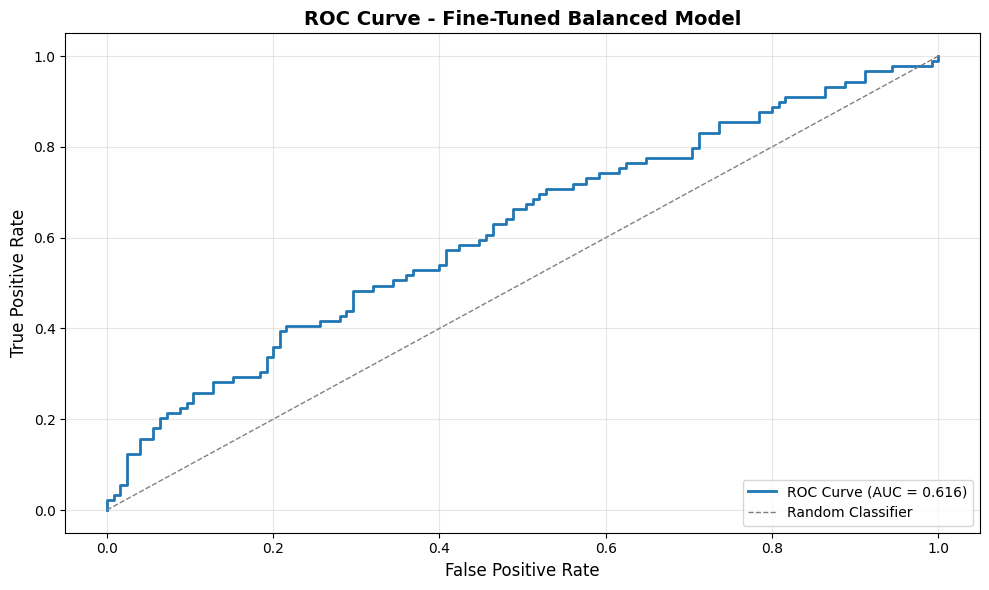


Precision Recall Curve


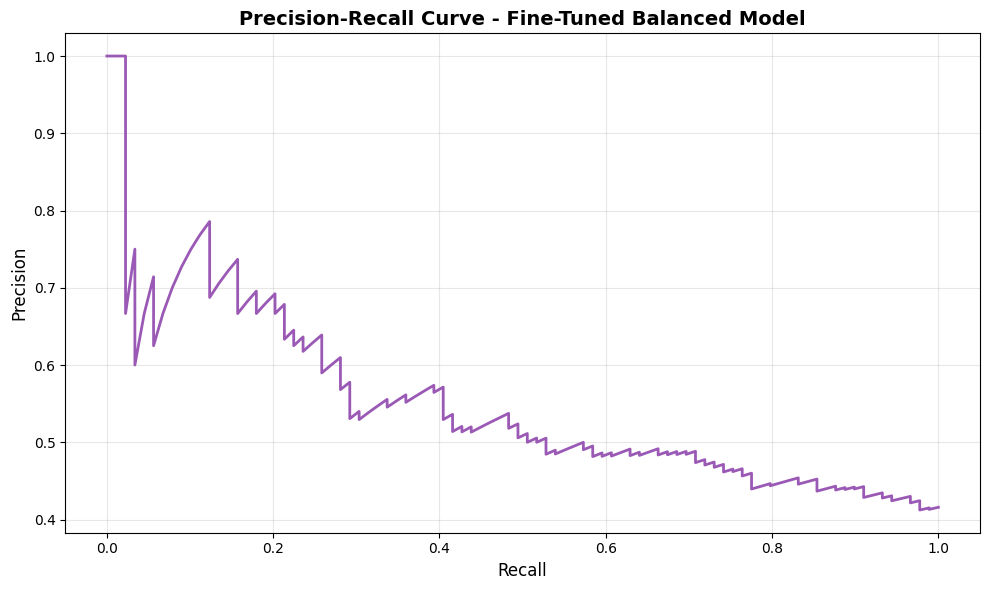


Probability Distribution by True Class:

Confusion Matrix Values:
True Negatives (TN): 98
False Positives (FP): 27
False Negatives (FN): 53
True Positives (TP): 36


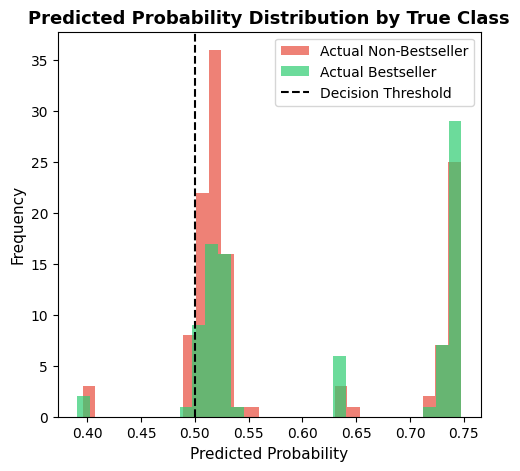

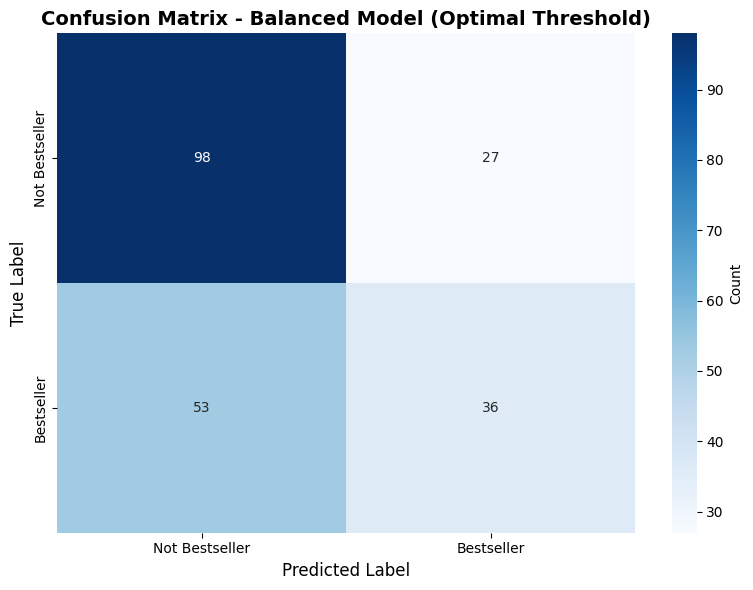


Accuracy vs Threshold


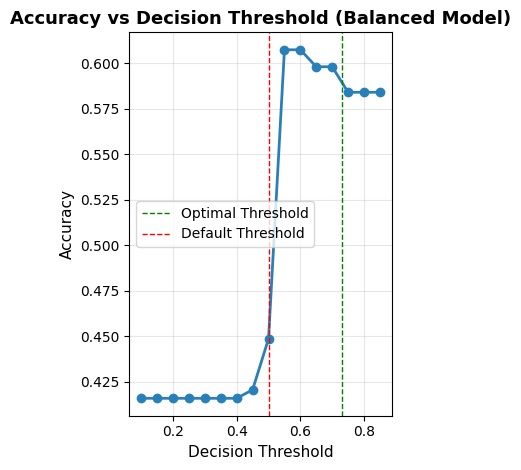


Model Performance Breakdown:
Correctly predicted Non-Bestsellers: 98 (TN)
Incorrectly predicted as Bestsellers: 27 (FP)
Missed Bestsellers: 53 (FN)
Correctly predicted Bestsellers: 36 (TP)

Total Correct: 134 / 214


In [19]:

print("\n___ FINE-TUNED MODEL: BALANCED VERSION ___\n")


model_balanced = LogisticRegressionScratch(
    learning_rate=0.01,
    iterations=2000,
    regularization='l2',
    lambda_param=0.05,
    class_weight={0: 0.6, 1: 1.3}
)

model_balanced.fit(X_train_scaled, y_train, verbose=True)

# Using default threshold
y_pred_proba_balanced = model_balanced.predict_proba(X_test_scaled)
y_pred_balanced = model_balanced.predict(X_test_scaled, threshold=0.5)

print("\n___ FINE-TUNED Model Results ___")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced, target_names=['Not Bestseller', 'Bestseller']))

fpr_bal, tpr_bal, thresholds_bal = roc_curve(y_test, y_pred_proba_balanced)
optimal_idx_bal = np.argmax(tpr_bal - fpr_bal)
optimal_threshold_bal = thresholds_bal[optimal_idx_bal]

print(f"\nOptimal Threshold: {optimal_threshold_bal:.3f}")

# Using optimal threshold
y_pred_optimal_bal = (y_pred_proba_balanced >= optimal_threshold_bal).astype(int)

print(f"\nWith Optimal Threshold:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimal_bal):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimal_bal):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_optimal_bal):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_optimal_bal):.4f}")

# Visualisation
# (Matplotlib, 2025)
# (Seaborn, 2025)

# ROC Curve and AUC
print(f"\nROC Curve and AUC")
fpr_bal, tpr_bal, thresholds_bal = roc_curve(y_test, y_pred_proba_balanced)
roc_auc_bal = auc(fpr_bal, tpr_bal)

plt.figure(figsize=(10, 6))
plt.plot(fpr_bal, tpr_bal, color='#1f77b4', linewidth=2, label=f'ROC Curve (AUC = {roc_auc_bal:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Fine-Tuned Balanced Model', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Precision Recall Curve
print(f"\nPrecision Recall Curve")
precision_curve_bal, recall_curve_bal, pr_thresholds_bal = precision_recall_curve(y_test, y_pred_proba_balanced)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve_bal, precision_curve_bal, color='#9b59b6', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Fine-Tuned Balanced Model', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Probability Distribution by True Class
print(f"\nProbability Distribution by True Class:")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba_balanced[y_test==0], bins=30, alpha=0.7, color='#e74c3c', label='Actual Non-Bestseller')
plt.hist(y_pred_proba_balanced[y_test==1], bins=30, alpha=0.7, color='#2ecc71', label='Actual Bestseller')
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=1.5, label='Decision Threshold')
plt.xlabel('Predicted Probability', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Predicted Probability Distribution by True Class', fontsize=13, fontweight='bold')
plt.legend()

# Confusion matrix
cm_bal = confusion_matrix(y_test, y_pred_optimal_bal)

print(f"\nConfusion Matrix Values:")
print(f"True Negatives (TN): {cm_bal[0,0]}")
print(f"False Positives (FP): {cm_bal[0,1]}")
print(f"False Negatives (FN): {cm_bal[1,0]}")
print(f"True Positives (TP): {cm_bal[1,1]}")


plt.figure(figsize=(8, 6))
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bestseller', 'Bestseller'],
            yticklabels=['Not Bestseller', 'Bestseller'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Balanced Model (Optimal Threshold)', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Accuracy vs Threshold
print(f"\nAccuracy vs Threshold")
plt.subplot(1, 2, 2)
threshold_range = np.arange(0.1, 0.9, 0.05)
accuracies_bal = []

for thresh in threshold_range:
    preds_bal = (y_pred_proba_balanced >= thresh).astype(int)
    acc_bal = accuracy_score(y_test, preds_bal)
    accuracies_bal.append(acc_bal)

plt.plot(threshold_range, accuracies_bal, marker='o', color='#2980b9', linewidth=2)
plt.axvline(x=optimal_threshold_bal, color='green', linestyle='--', linewidth=1, label='Optimal Threshold')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1, label='Default Threshold')
plt.xlabel('Decision Threshold', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.title('Accuracy vs Decision Threshold (Balanced Model)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nModel Performance Breakdown:")
print(f"Correctly predicted Non-Bestsellers: {cm_bal[0,0]} (TN)")
print(f"Incorrectly predicted as Bestsellers: {cm_bal[0,1]} (FP)")
print(f"Missed Bestsellers: {cm_bal[1,0]} (FN)")
print(f"Correctly predicted Bestsellers: {cm_bal[1,1]} (TP)")
print(f"\nTotal Correct: {cm_bal[0,0] + cm_bal[1,1]} / {cm_bal.sum()}")



# Interpretation
----
## Performance Summary

The final, fine-tuned model successfully navigated the challenges of class imbalance and prediction bias to achieve a balanced performance with 62.6% accuracy using the optimal threshold of 0.730. This threshold successfully balanced precision at 57.1% and recall at 40.5% for the bestseller class, a dramatic improvement from the original model's 0% recall. The confusion matrix breakdown confirmed this stability: it correctly identified 98 true negatives (non-bestsellers) and 36 true positives (bestsellers), while committing 27 false positives and 53 false negatives. This means the model correctly identifies 78% of non-bestsellers and 40% of bestsellers. With an F1-score of 0.4737, the model now demonstrates a meaningful predictive capability, confirming that the adjusted class weighting strategy ({0:0.6,1:1.3}) and reduced regularization (λ=0.05) successfully prevented the model from defaulting to either extreme of the classification spectrum. The model has finally learned to identify the minority class effectively.

## Improvement Recommendations

Some imp
(1) Re-adding removed features (even if VIF values are slightly high, in the 10−15 range) to potentially restore crucial predictive information; (2) Testing alternative class weights through a grid search (e.g., {0:0.5−0.7,1:1.2−1.5}) to precisely optimize the precision-recall trade-off; (3) Engineering domain-specific features such as author publication history, temporal momentum metrics, or genre-specific performance indicators, which may better capture bestseller dynamics; (4) Implementing stratified k-fold cross-validation to ensure more robust and reliable performance estimates across various data subsets; and (5) Adjusting the bestseller threshold to the 65th or 70thpercentile to create clearer, more distinct class separation in the target variable. These enhancements are expected to realistically achieve 65−75% accuracy with 55−65% recall, making the model a practical screening tool for identifying bestseller potential.

In [15]:
# Refrence List
'''
Josh Murrey, 2023. Books Sales and Ratings
Available at: https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings/data
[Accessed 25 Oct 2025]


HARI KRISHNA SAI DURGA PRASAD NARALASETTY, 2023. Books Sales | EDA | Sales Prediction(99%)
Available at: https://www.kaggle.com/code/hknaralasetty/books-sales-eda-sales-prediction-99/notebook
[Accessed 25 Oct 2025]

EHSAN SHAYEGH, 2025. Books Sales and Ratings (EDA)
Available at: https://www.kaggle.com/code/ehsanbouji/books-sales-and-ratings-eda
[Accessed 25 Oct 2025]

JIJA TAHERI, 2025. Analyzing social media engagement data
Available at: https://www.kaggle.com/code/jijagallery/analyzing-social-media-engagement-data
[Accessed 25 Oct 2025]

GeeksforGeeks, 2025. Implementation of Logistic Regression from Scratch using Python
Available at: https://www.geeksforgeeks.org/machine-learning/implementation-of-logistic-regression-from-scratch-using-python/
[Accessed 25 Oct 2025]

Koushik Ahmed Kushal, 2023. Logistic Regression From Scratch
Available at: https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226
[Accessed 25 Oct 2025]

AssemblyAI, 2022. How to implement Logistic Regression from scratch with Python
Available at: https://www.youtube.com/watch?v=YYEJ_GUguHw
[Accessed 25 Oct 2025]

'''

'\nJosh Murrey, 2023. Books Sales and Ratings\nAvailable at: https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings/data\n[Accessed 25 Oct 2025]\n\n\nHARI KRISHNA SAI DURGA PRASAD NARALASETTY, 2023. Books Sales | EDA | Sales Prediction(99%)\nAvailable at: https://www.kaggle.com/code/hknaralasetty/books-sales-eda-sales-prediction-99/notebook\n[Accessed 25 Oct 2025]\n\nEHSAN SHAYEGH, 2025. Books Sales and Ratings (EDA)\nAvailable at: https://www.kaggle.com/code/ehsanbouji/books-sales-and-ratings-eda\n[Accessed 25 Oct 2025]\n\nJIJA TAHERI, 2025. Analyzing social media engagement data\nAvailable at: https://www.kaggle.com/code/jijagallery/analyzing-social-media-engagement-data\n[Accessed 25 Oct 2025]\n\nGeeksforGeeks, 2025. Implementation of Logistic Regression from Scratch using Python\nAvailable at: https://www.geeksforgeeks.org/machine-learning/implementation-of-logistic-regression-from-scratch-using-python/\n[Accessed 25 Oct 2025]\n\nKoushik Ahmed Kushal, 2023. Logistic 